# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


## Importing necessory libarary

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv") #reading the data file
df.head() #diplaying the dataset with first 5 and last 5 

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [3]:
df.shape #The Total number of data (same as df)

(32560, 15)

In [4]:
df.columns #to see the columns names

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.head() #to see 5 first row of dataset

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

## EDA

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
print (df.info()) #to check for null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(32536, 15)

We see there were some duplicate rows so we have now 32536 rows from 32560 which is slight reduction in data but we have got rid of duplicates

In [10]:
df.dtypes 

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [12]:
df['Age'].nunique() # we see the total unique values in Age

73

In [13]:
df['Workclass'].unique() # to see the no of values in workclass

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df['Fnlwgt'].nunique() 

21647

In [15]:
df['Education'].unique() #we see 886 unique values here

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
df['Education_num'].unique() # we see the 16 categories in department

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [17]:
df['Marital_status'].unique() # we have 7 categorial values in this column

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [18]:
df['Occupation'].unique() # we have 15 different occupations here and also the same ? category as well

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
df['Relationship'].unique()

 # we have 6 categories in different fields we cannot differentiate the weightage so we will give label encoding here

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [20]:
df['Race'].unique() # we can see 5 classes of race here

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [21]:
df['Sex'].unique()

 #this is the gender category

array([' Male', ' Female'], dtype=object)

In [22]:
df['Capital_gain'].nunique() #this is the gains in the person's capital for the assessment year

119

In [23]:
df['Capital_loss'].nunique() #this is the loss in the person's capital for the assessment year

92

In [24]:
df['Hours_per_week'].nunique() # we see the value of per person hours of work per week

94

In [25]:
df['Native_country'].unique() 

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df['Income'].unique() #This is the target coulns which shows if there are earning more or less than 50k per year

array([' <=50K', ' >50K'], dtype=object)

In [27]:
# Checking the unique values in each column

for col in df:
    print(df[col].nunique(),'\n')

73 

9 

21647 

16 

16 

7 

15 

6 

5 

2 

119 

92 

94 

42 

2 



In [28]:
# Checking to see if any of the values in Target  is white spaces

df.loc[df['Income'] == " "]

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []

## EDA

### Visualization of the Data

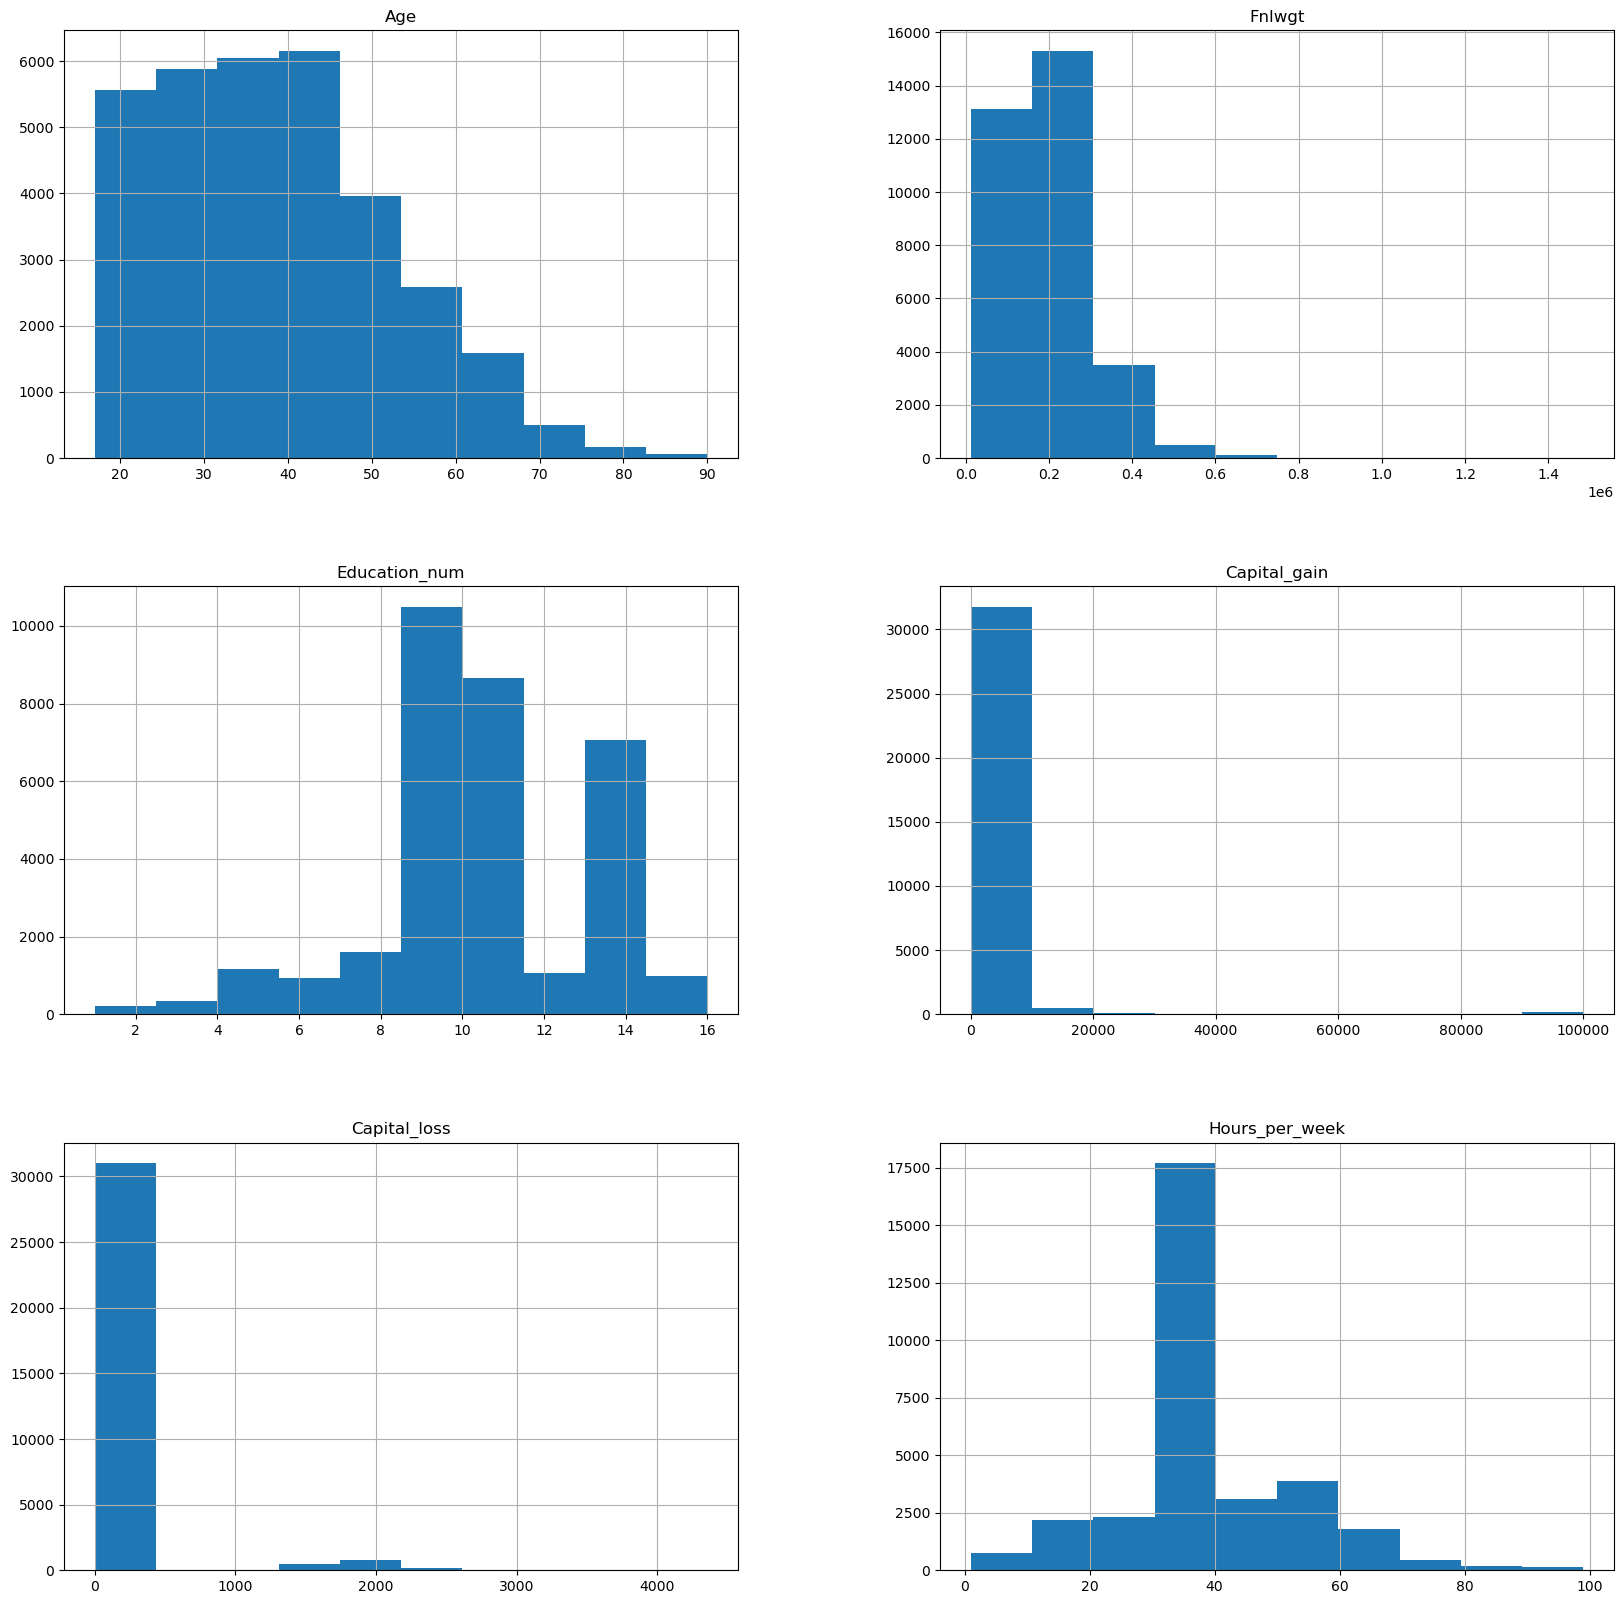

In [29]:
df.hist(figsize=(20,20))
plt.show()

## Splitting the columns with categorical and numerica data

In [30]:
# We are defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

We have 9 categorical features : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [31]:
df_visualization_continuous=df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].copy()

In [32]:
df_visualization_nominal=df[['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']]

## Visualization of the distribution of the continuous value of the float and int columns.

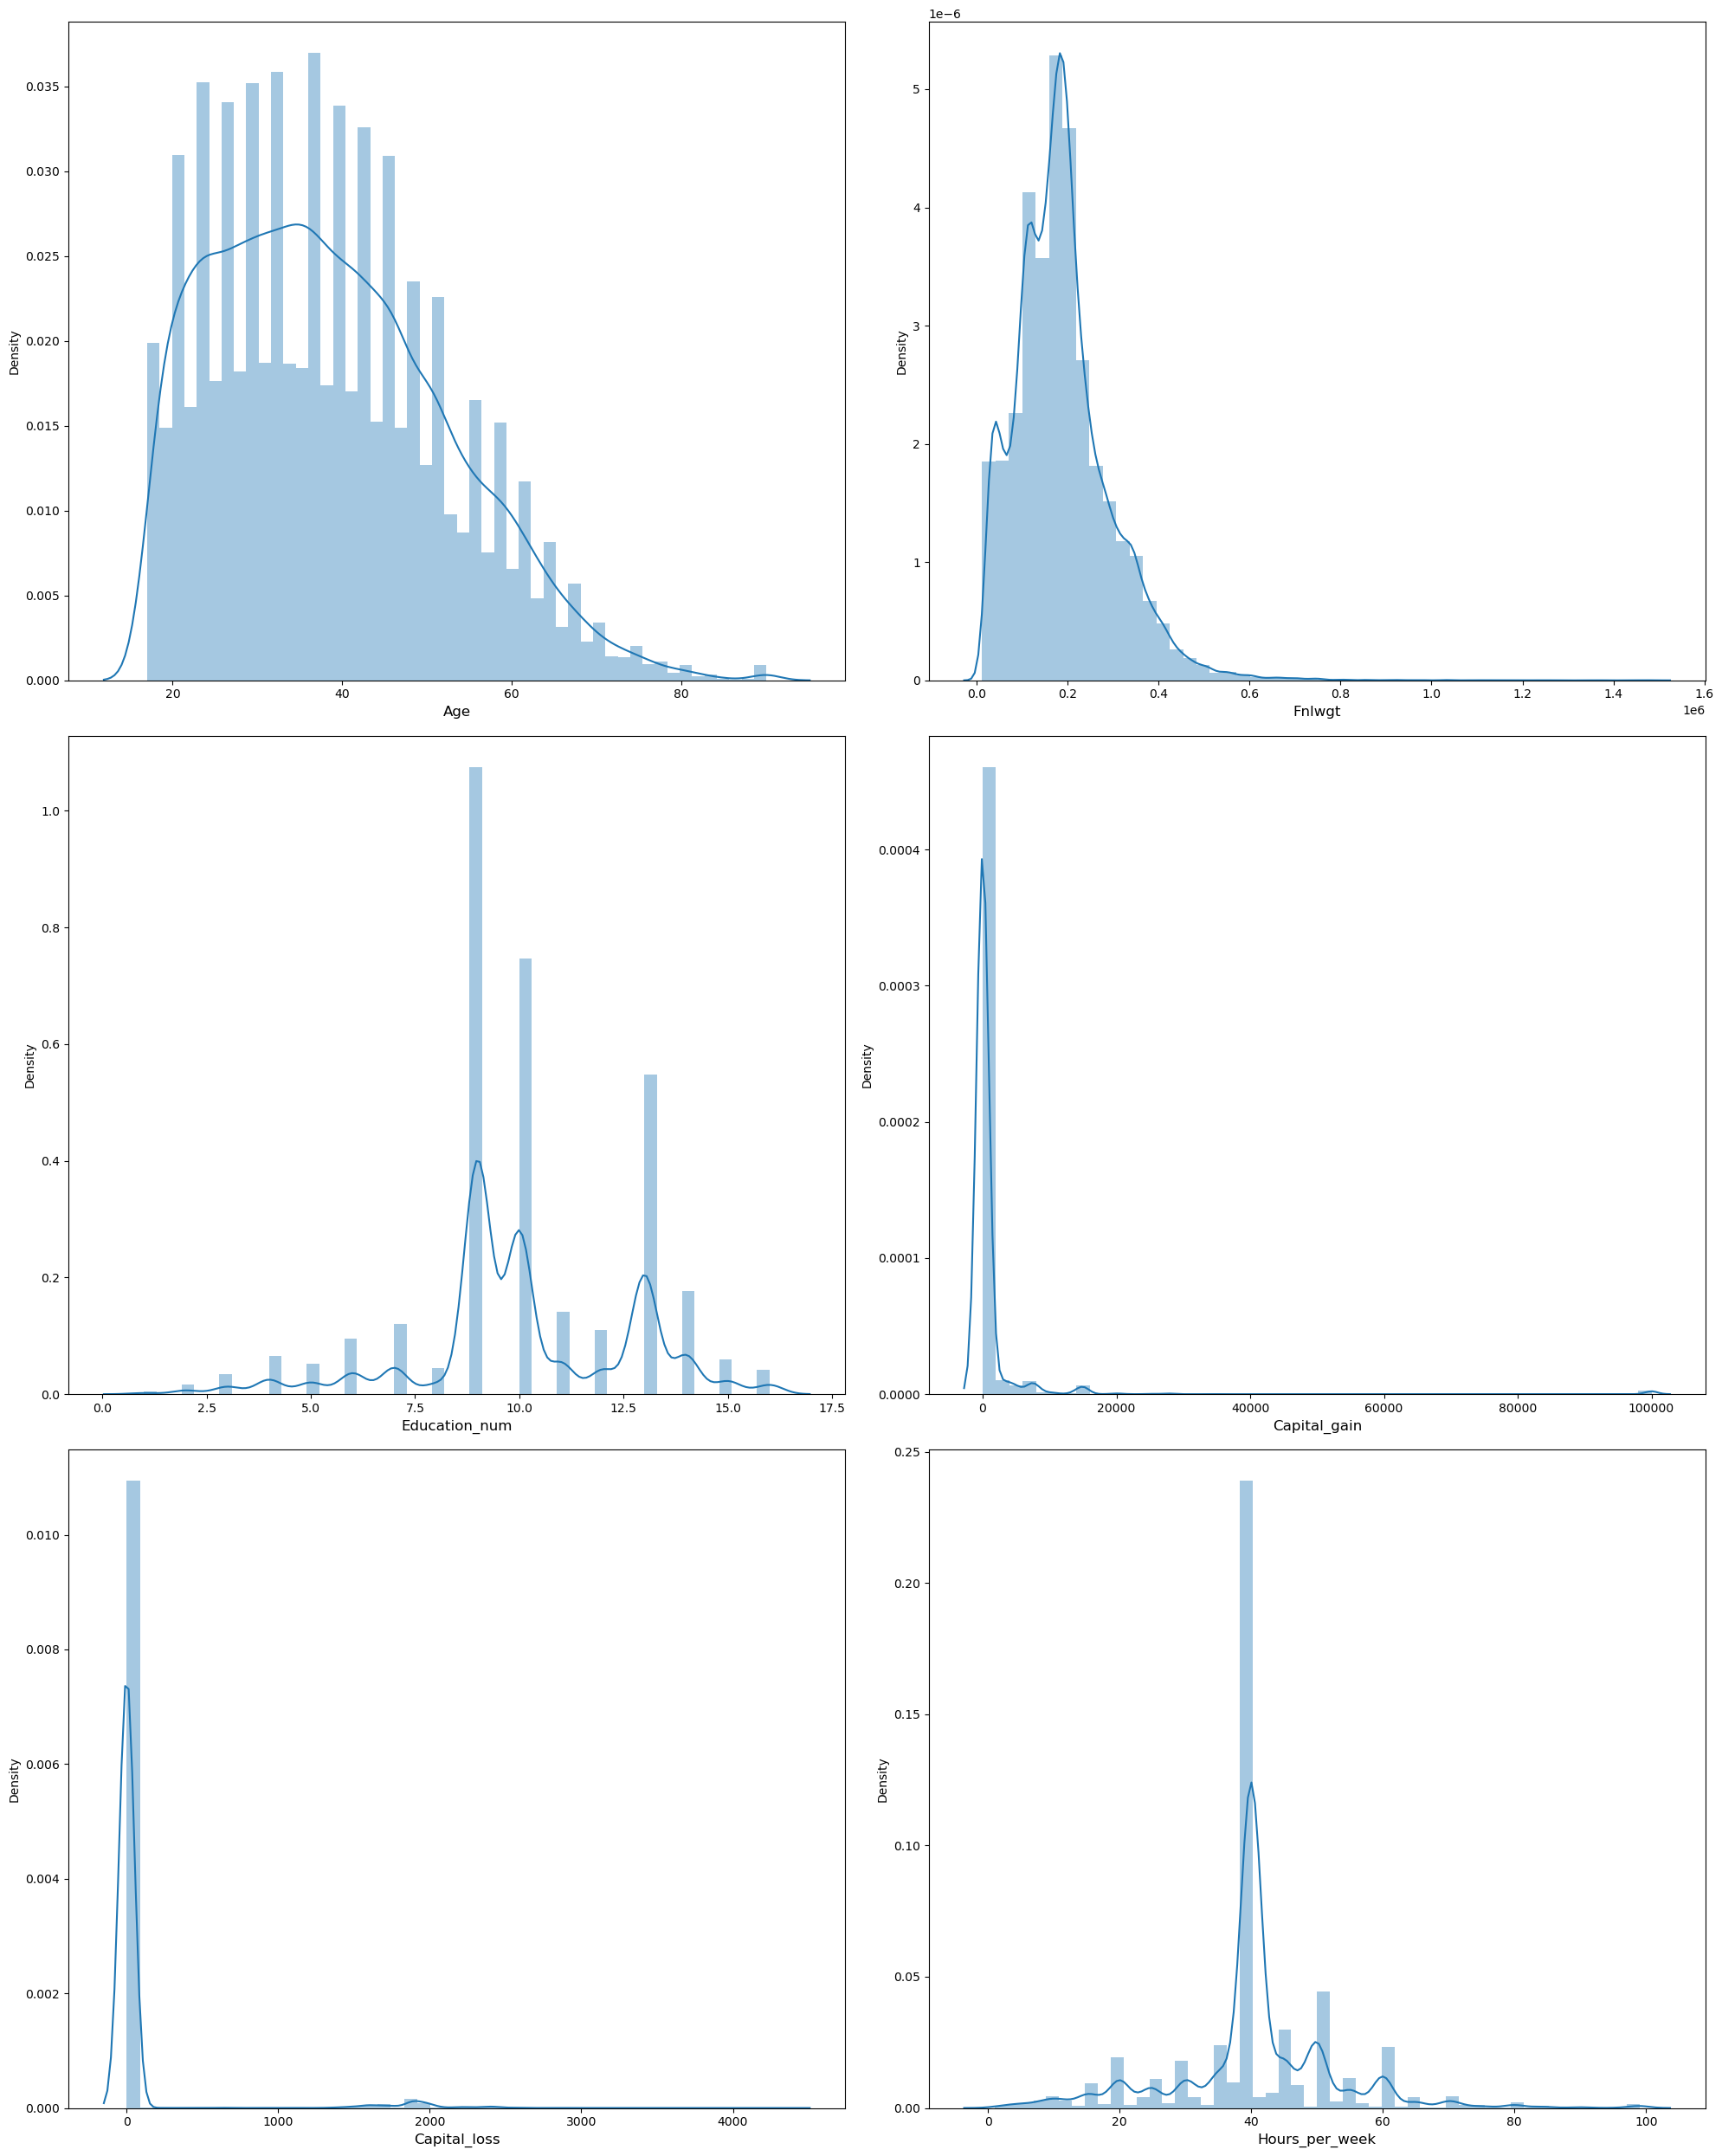

In [33]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

We see that the columns 'Age', 'Capital gain ', 'apital loss', ' all are skewed to the right where capital gain and loss the value is very high showing a very similar pattern in the distplot as well , we need to analyse individually to study better
        

## Treating the target variable where we give >50k 1 and we give <=50k 0

In [34]:
df['Income'] = df['Income'].factorize([' >50K', ' <=50K' ])[0]

In [35]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32555       0  
32556       1  
32557       0  
32558       0  
32559       1  

[32536 rows x 15 columns]

## Visualizing the Target Variable 

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


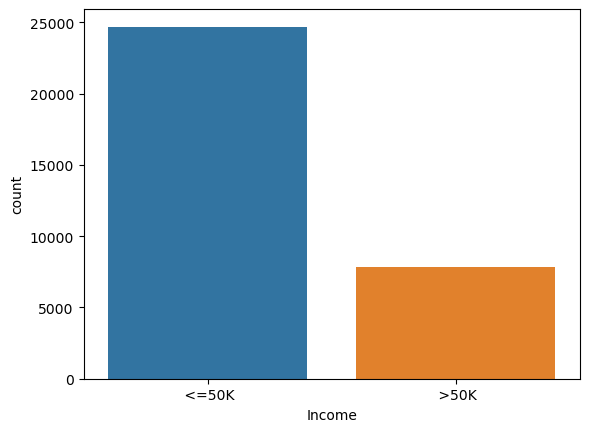

In [36]:
ax = sns.countplot(x='Income',data = df_visualization_nominal)
print(df_visualization_nominal['Income'].value_counts())

0    24697
1     7839
Name: Income, dtype: int64


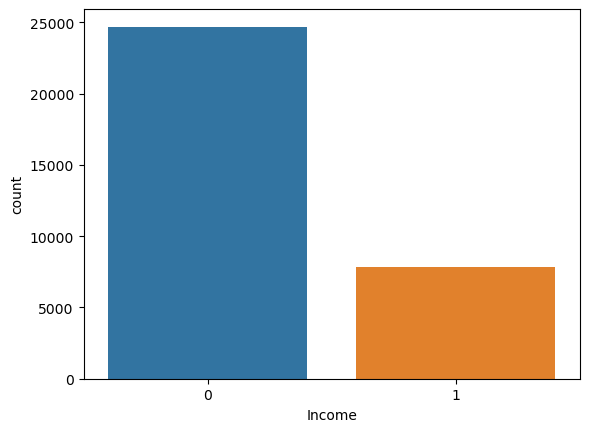

In [37]:
ax = sns.countplot(x='Income',data = df)
print(df['Income'].value_counts())

In [38]:
import plotly.graph_objs as go
import plotly.offline as py
less_50 = df[(df['Income'] != 0)]
more_50 = df[(df['Income'] == 0)]

trace = go.Pie(labels = ['less than 50k', 'more than 50k'], values = df['Income'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of Income variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

We see a huge imbalance in the label column where the people earning more than 50k are only 24.1% so we need to balance the dataset almost 76% is earining less than 50k per year

## Lets graph the data for columns individually so we can make clear findings

<AxesSubplot:xlabel='Age', ylabel='Density'>

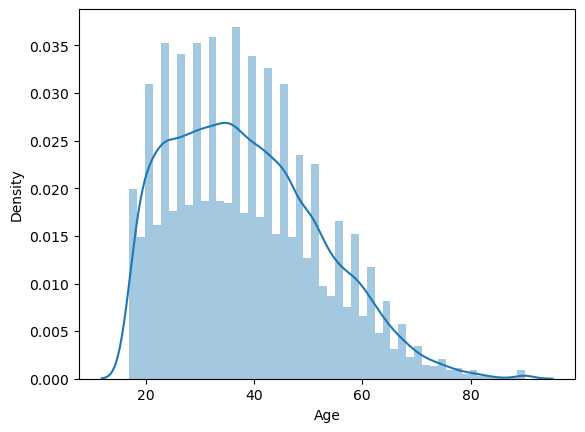

In [39]:
sns.distplot(df_visualization_continuous['Age'],kde=True,)

<AxesSubplot:xlabel='Age', ylabel='Count'>

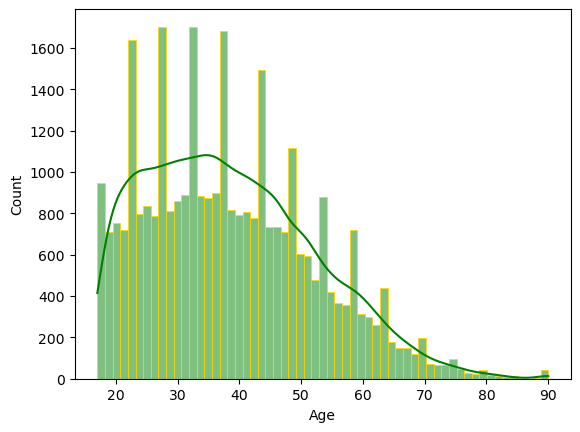

In [40]:
sns.histplot(x=df_visualization_continuous['Age'], ec = "gold", color='g', kde=True)

We see that the data is right skewed and we see some outliers in the dataset , we see the max age is betweem 25 -45 approx

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

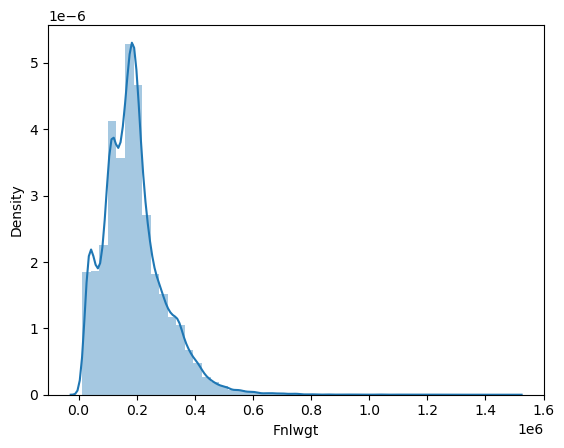

In [41]:
sns.distplot(df['Fnlwgt'],kde=True,)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

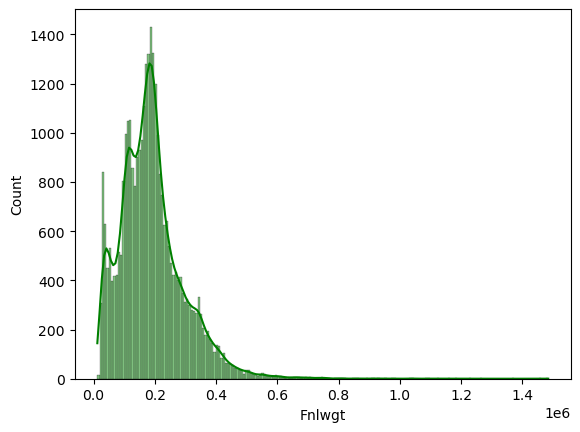

In [42]:
sns.histplot(x=df.Fnlwgt, ec = "black", color='g', kde=True)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

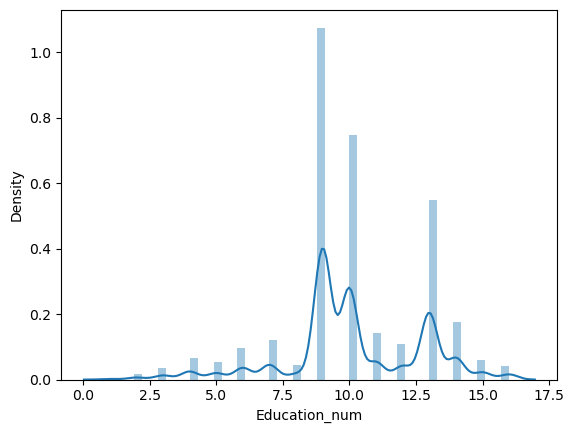

In [43]:
sns.distplot(df['Education_num'],kde=True,)

<AxesSubplot:xlabel='Education_num', ylabel='Count'>

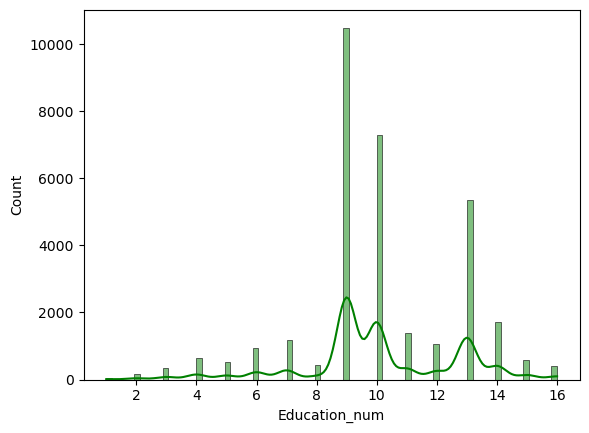

In [44]:
sns.histplot(x=df['Education_num'], ec = "black", color='g', kde=True)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

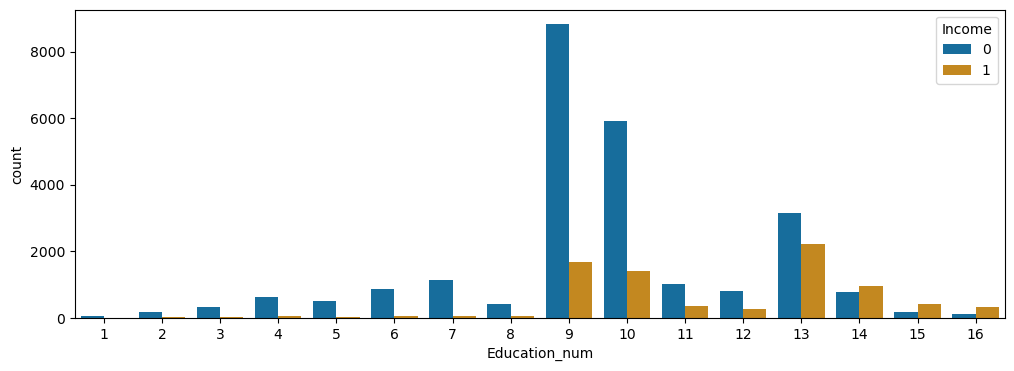

In [45]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Education_num", hue="Income", data=df, palette="colorblind")

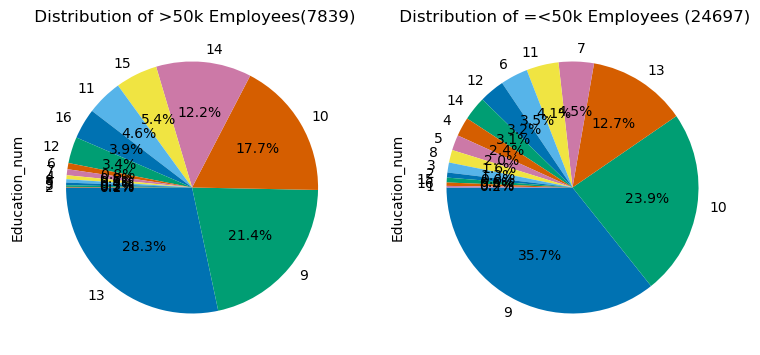

In [46]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Education_num"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Education_num"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

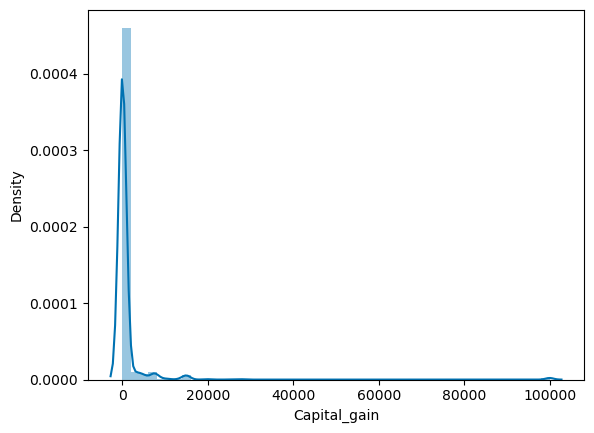

In [47]:
sns.distplot(df['Capital_gain'],kde=True,)

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

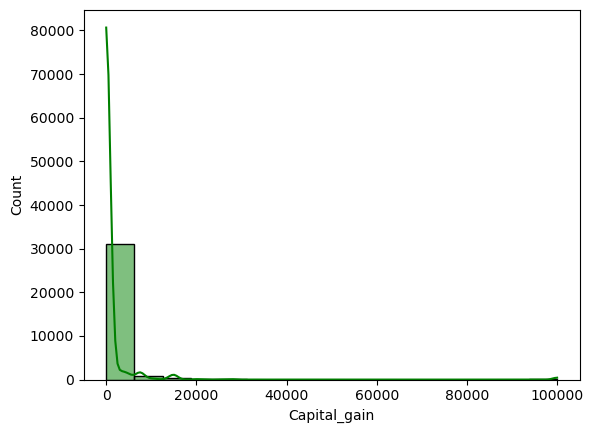

In [48]:
sns.histplot(x=df['Capital_gain'], ec = "black", color='g', kde=True)

<AxesSubplot:xlabel='Capital_gain', ylabel='count'>

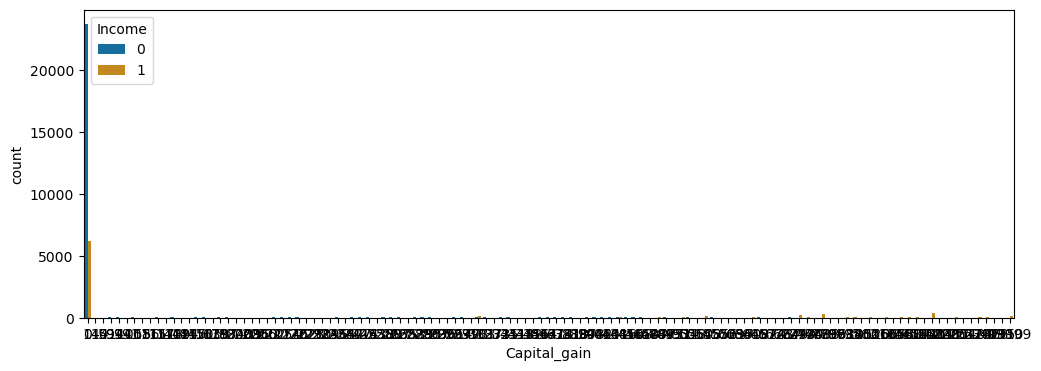

In [49]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Capital_gain", hue="Income", data=df, palette="colorblind")

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

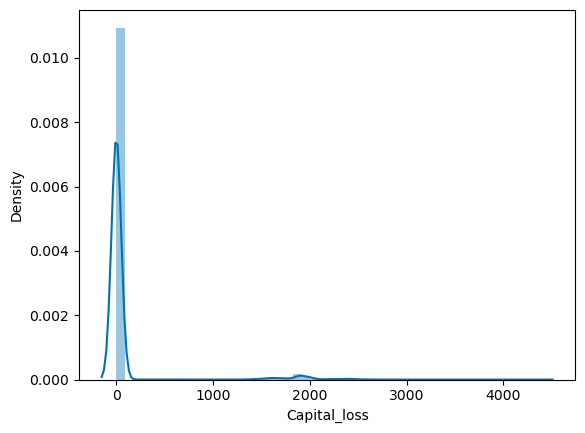

In [50]:
sns.distplot(df['Capital_loss'],kde=True,)

<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

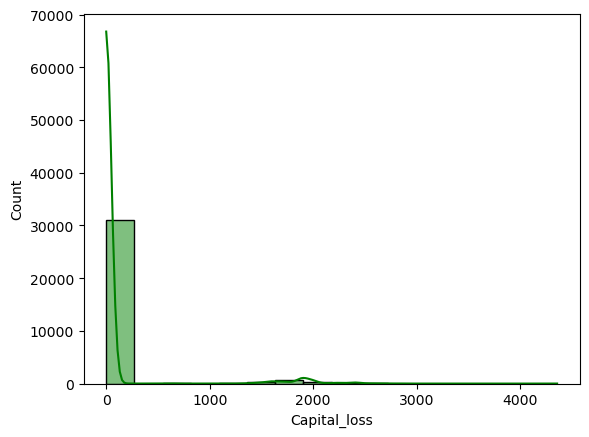

In [51]:
sns.histplot(x=df['Capital_loss'], ec = "black", color='g', kde=True)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

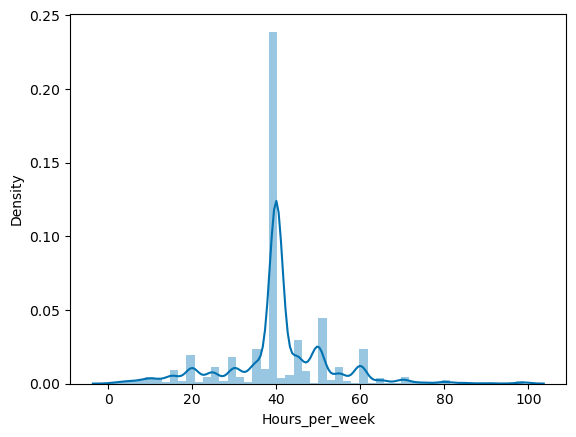

In [52]:
sns.distplot(df['Hours_per_week'],kde=True,)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

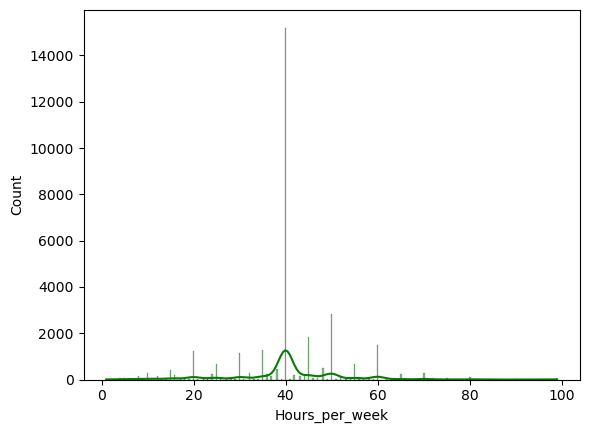

In [53]:
sns.histplot(x=df['Hours_per_week'], ec = "black", color='g', kde=True)

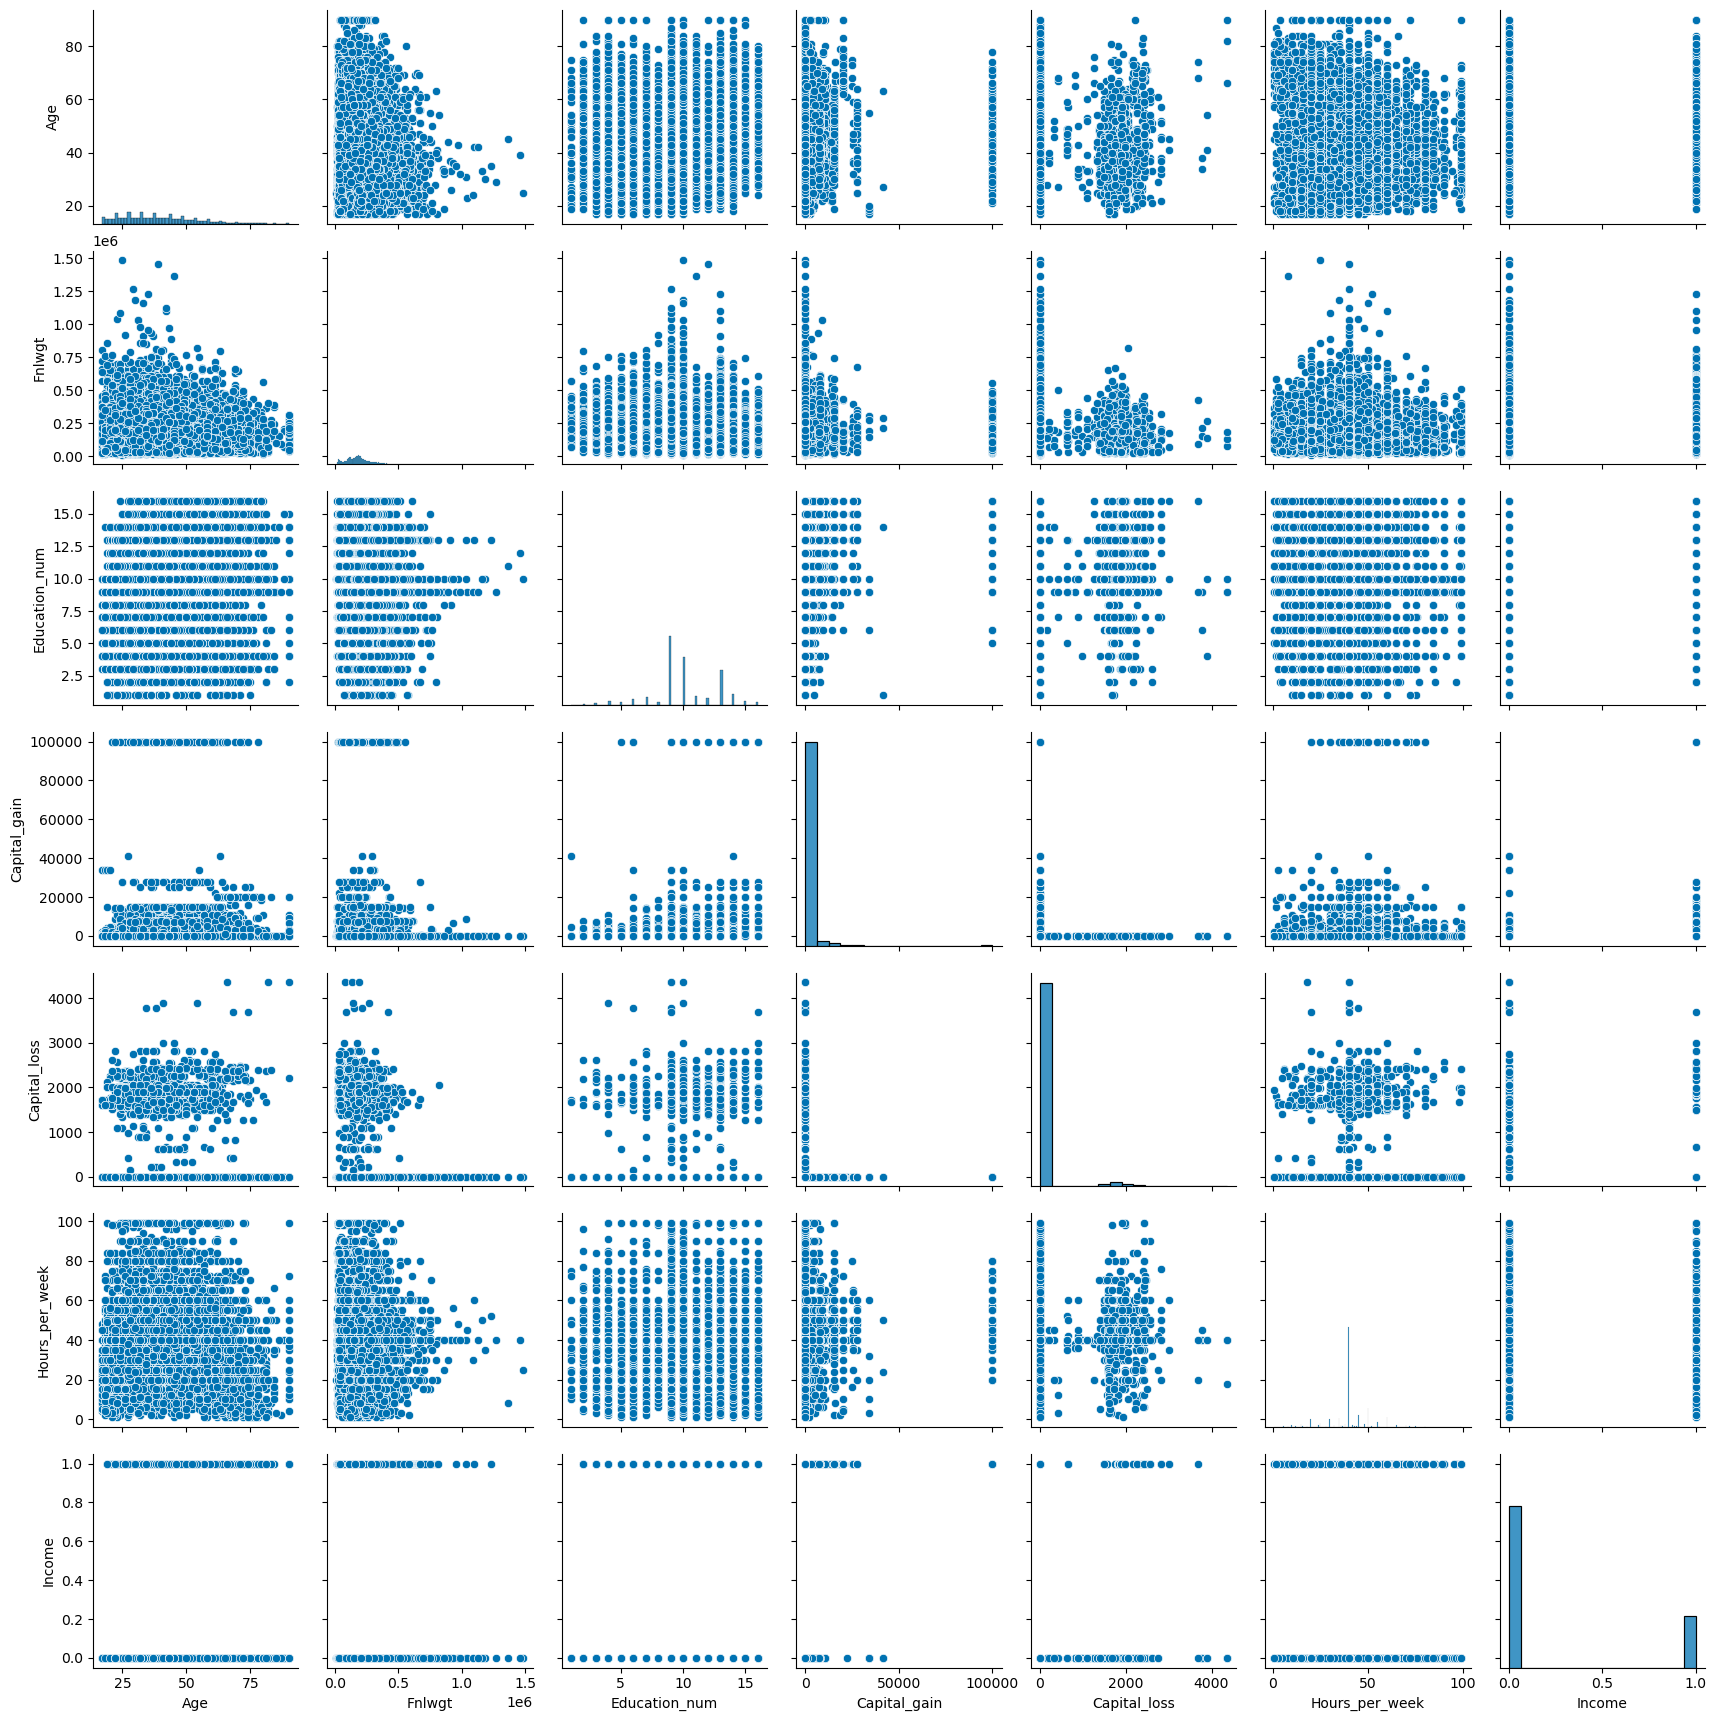

In [54]:
sns.pairplot(df)

### We see a number of observation in the pairplot , but the relationship is very hard to pinpoint so we will need to plot different relationship plots to find the actual relationship between the columns

## Visualization of the categorical features

In [55]:
import plotly.graph_objs as go
import plotly.offline as py
less_50 = df[(df['Income'] != 0)]
more_50 = df[(df['Income'] == 0)]

trace = go.Pie(labels = ['less than 50k', 'more than 50k'], values = df['Income'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of Income variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


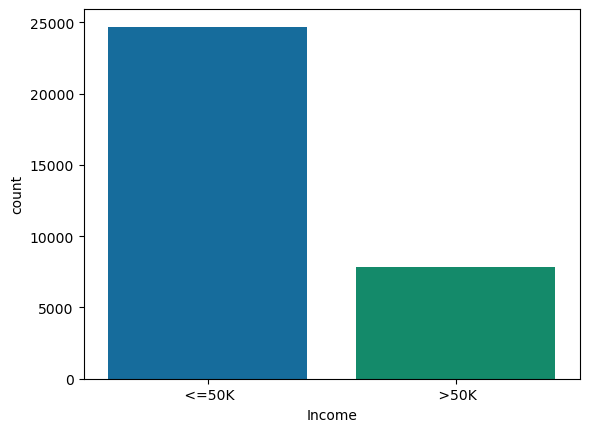

In [56]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Income',data = df_visualization_nominal)
print(df_visualization_nominal['Income'].value_counts())

In [57]:
df_visualization_nominal.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


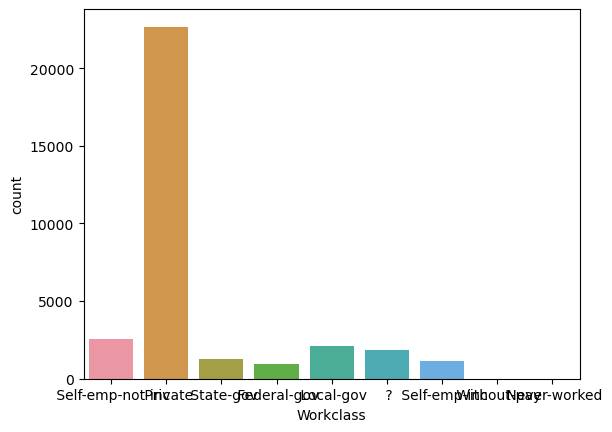

In [58]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Workclass',data = df_visualization_nominal)
print(df_visualization_nominal['Workclass'].value_counts())

<AxesSubplot:xlabel='Workclass', ylabel='count'>

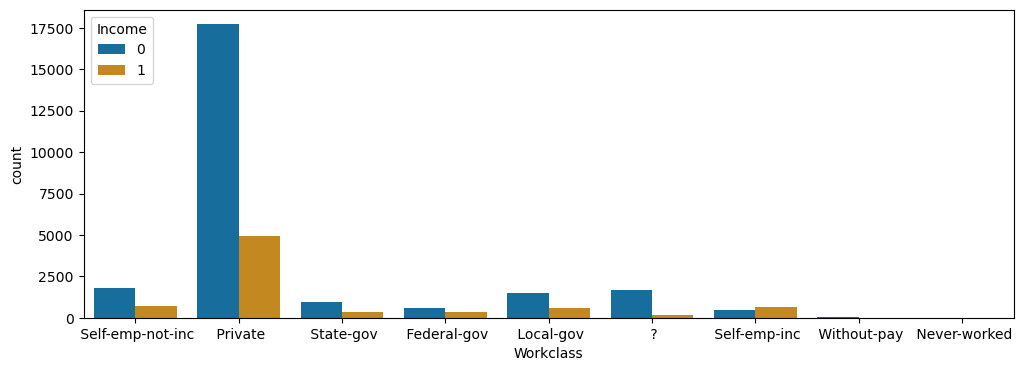

In [59]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Workclass", hue="Income", data=df, palette="colorblind")

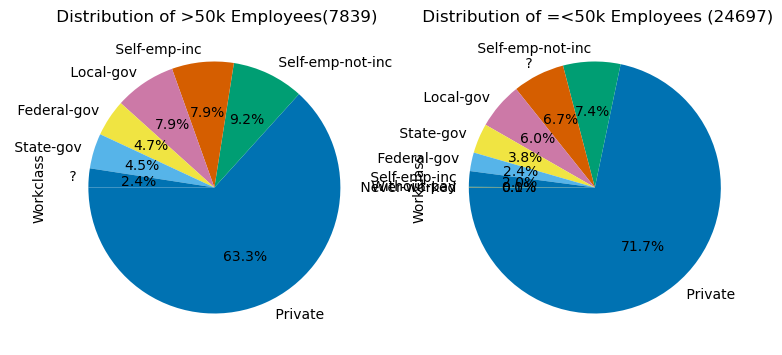

In [60]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Workclass"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Workclass"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


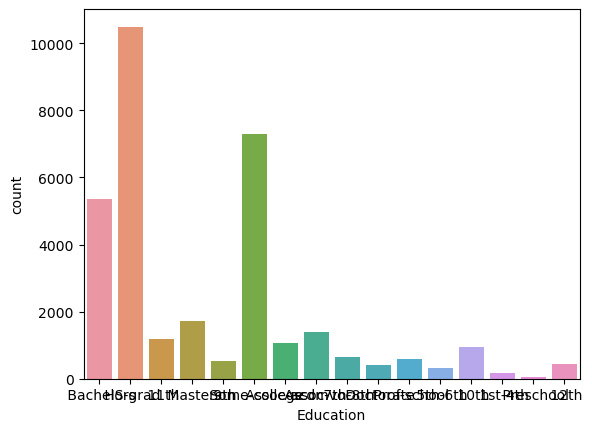

In [61]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Education',data = df_visualization_nominal)
print(df_visualization_nominal['Education'].value_counts())

<AxesSubplot:xlabel='Education', ylabel='count'>

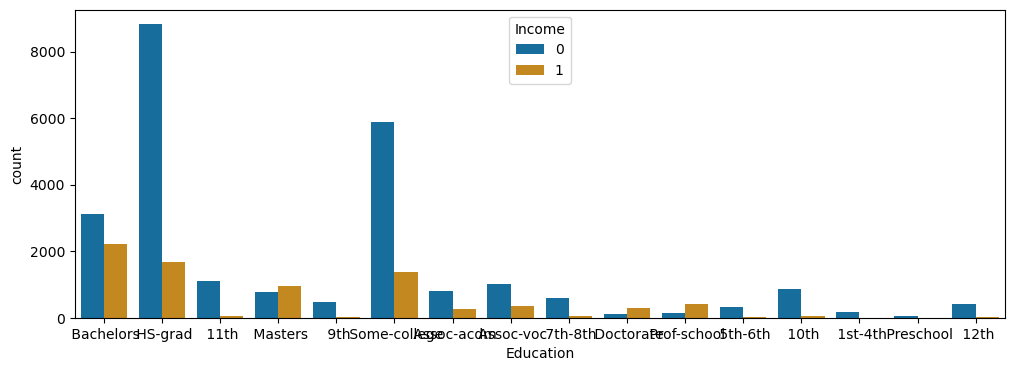

In [62]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Education", hue="Income", data=df, palette="colorblind")

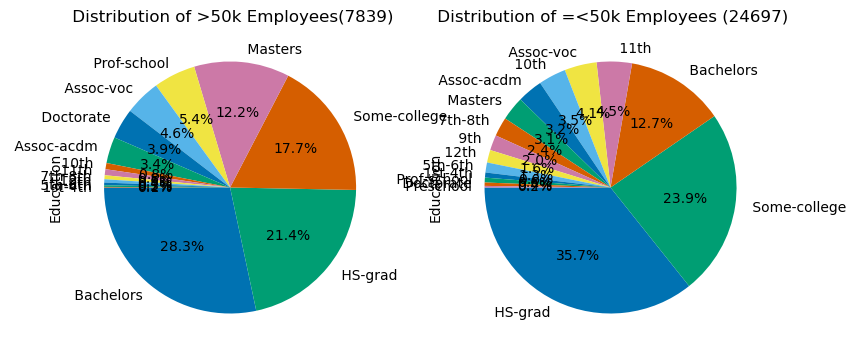

In [63]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Education"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Education"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


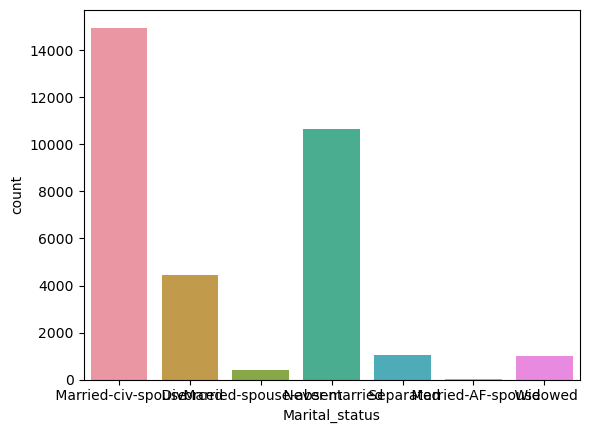

In [64]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Marital_status',data = df_visualization_nominal)
print(df_visualization_nominal['Marital_status'].value_counts())

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

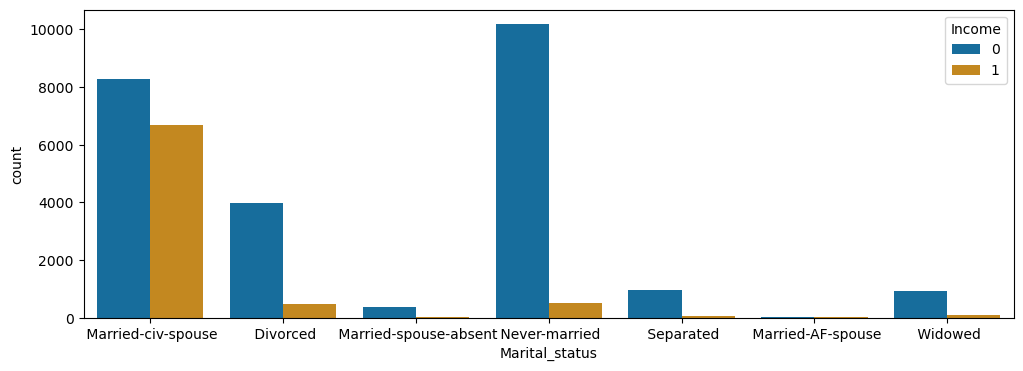

In [65]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Marital_status", hue="Income", data=df, palette="colorblind")

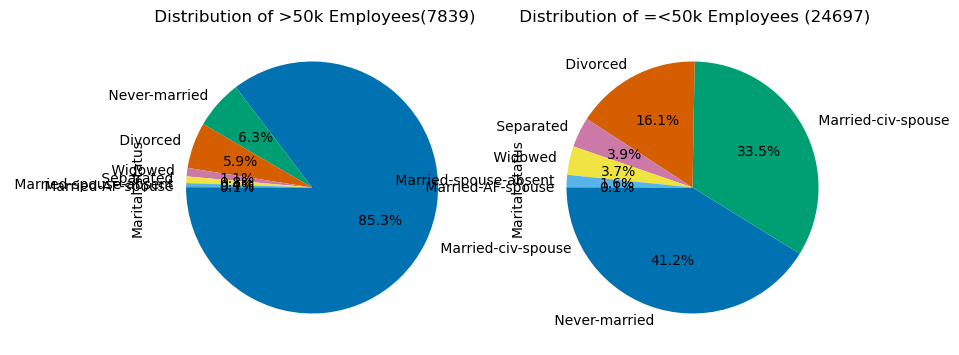

In [66]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Marital_status"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Marital_status"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


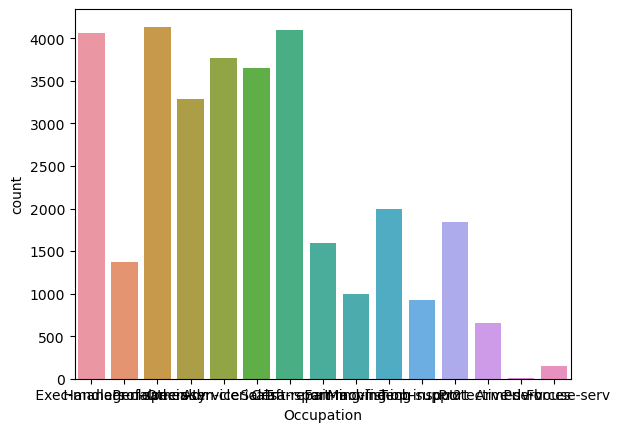

In [67]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Occupation',data = df_visualization_nominal)
print(df_visualization_nominal['Occupation'].value_counts())

<AxesSubplot:xlabel='Occupation', ylabel='count'>

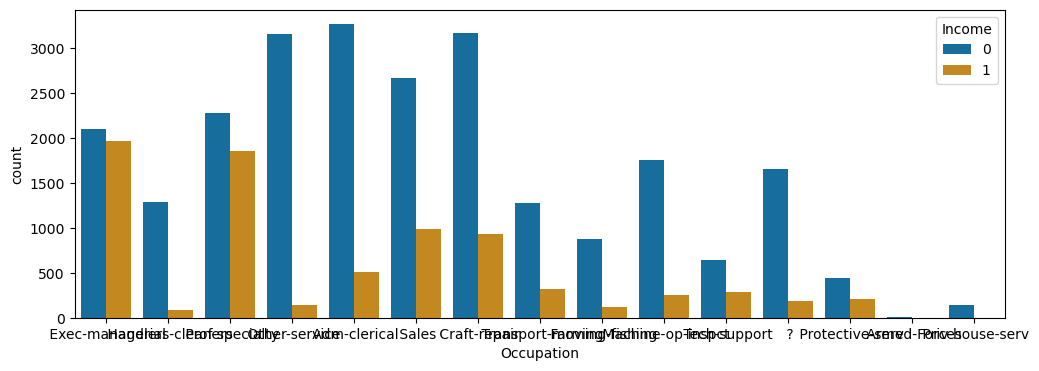

In [68]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Occupation", hue="Income", data=df, palette="colorblind")

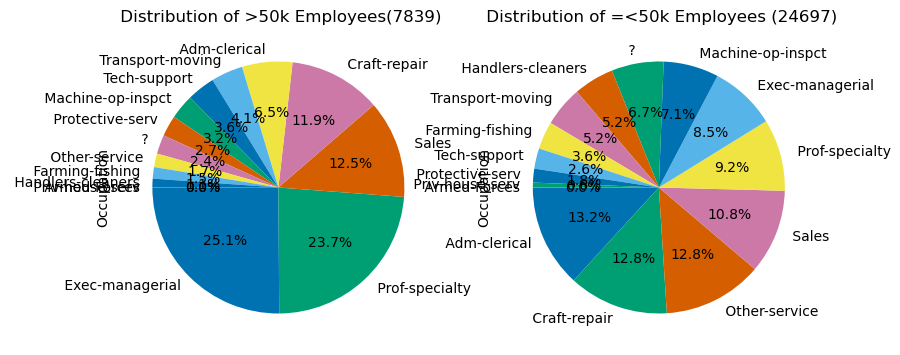

In [69]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Occupation"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Occupation"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

In [70]:
df_visualization_nominal.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


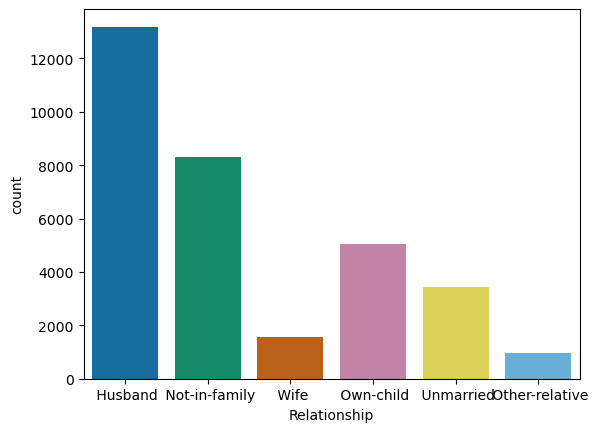

In [71]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Relationship',data = df_visualization_nominal)
print(df_visualization_nominal['Relationship'].value_counts())

<AxesSubplot:xlabel='Relationship', ylabel='count'>

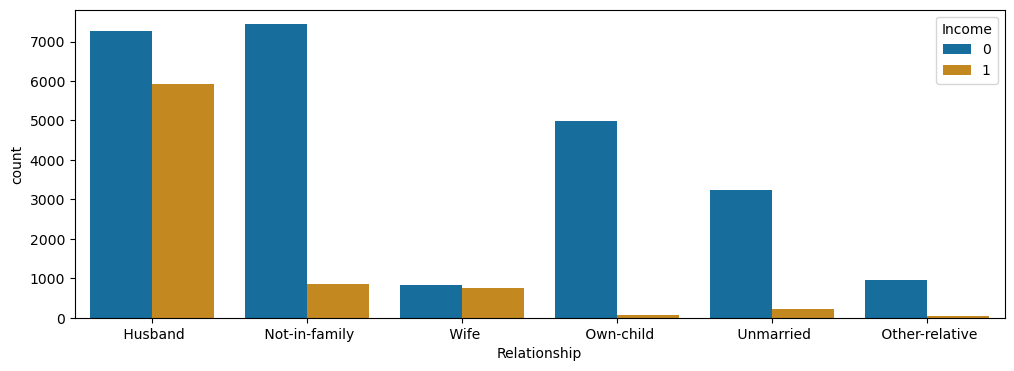

In [72]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Relationship", hue="Income", data=df, palette="colorblind")

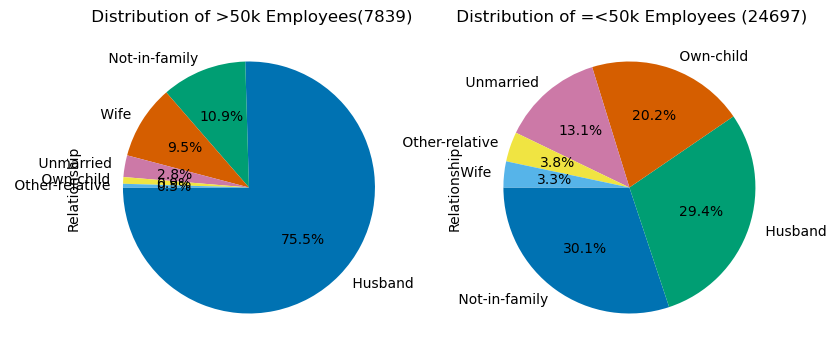

In [73]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Relationship"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Relationship"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


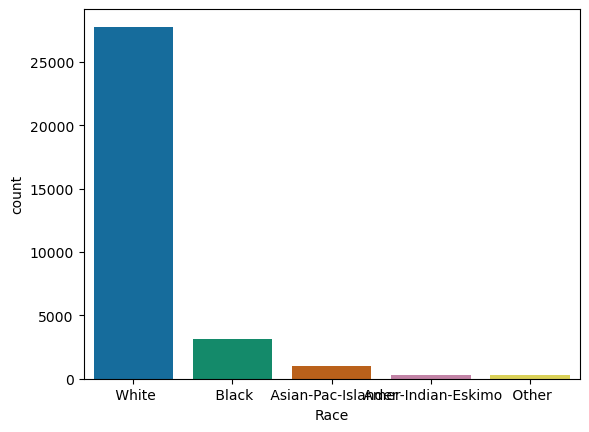

In [74]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Race',data = df_visualization_nominal)
print(df_visualization_nominal['Race'].value_counts())

<AxesSubplot:xlabel='Race', ylabel='count'>

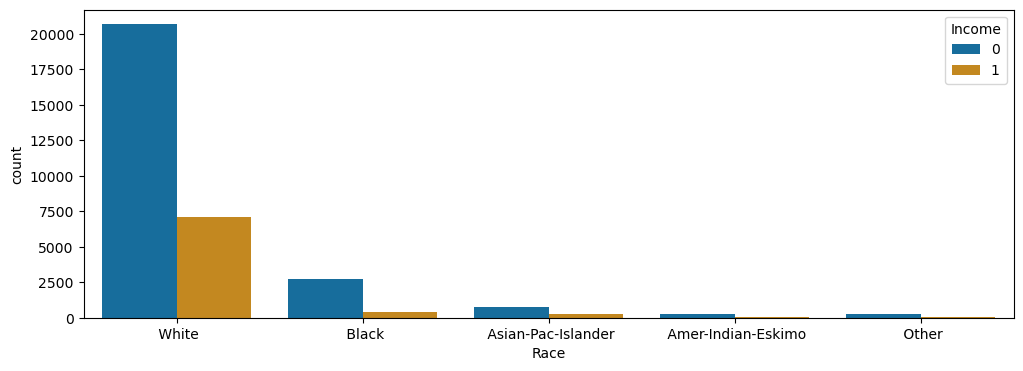

In [75]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Race", hue="Income", data=df, palette="colorblind")

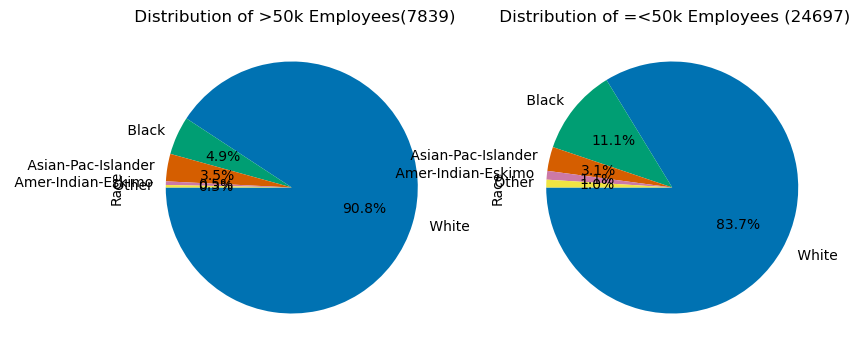

In [76]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Race"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Race"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 Male      21774
 Female    10762
Name: Sex, dtype: int64


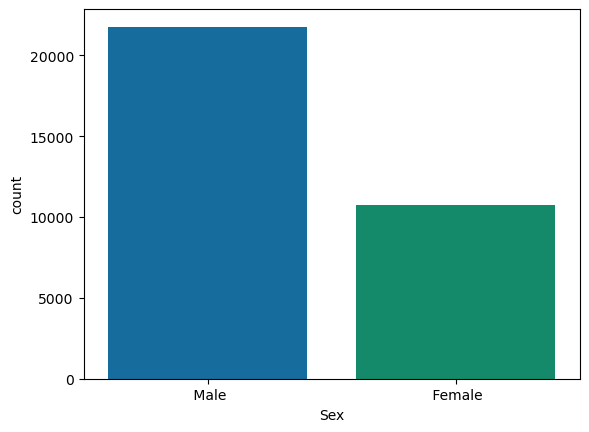

In [77]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Sex',data = df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

<AxesSubplot:xlabel='Sex', ylabel='count'>

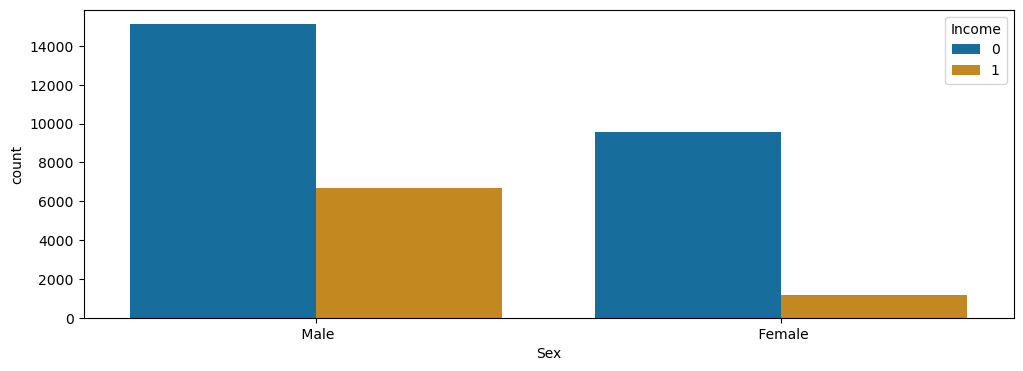

In [78]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Sex", hue="Income", data=df, palette="colorblind")

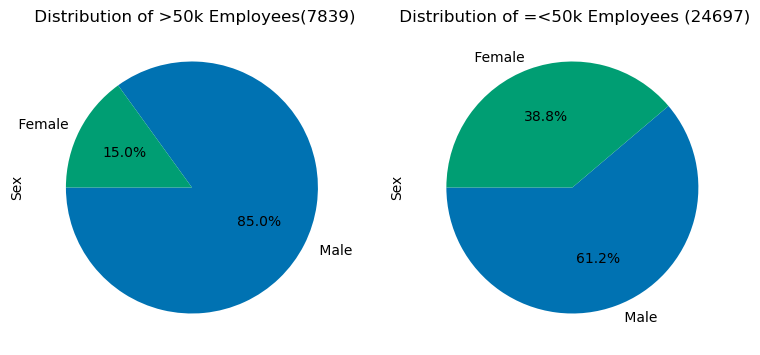

In [79]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Sex"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Sex"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

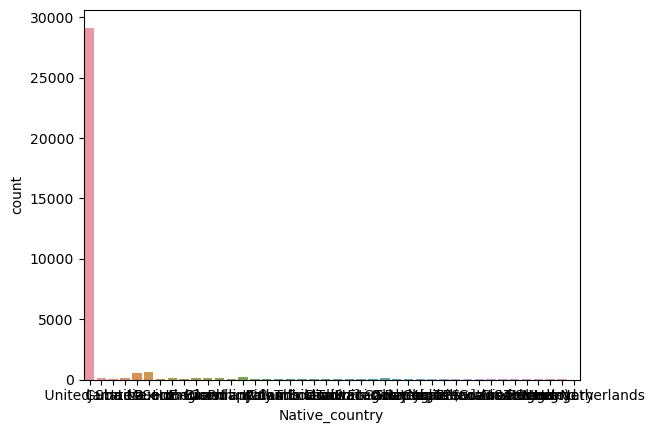

In [80]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Native_country',data = df_visualization_nominal)
print(df_visualization_nominal['Native_country'].value_counts())

<AxesSubplot:xlabel='Native_country', ylabel='count'>

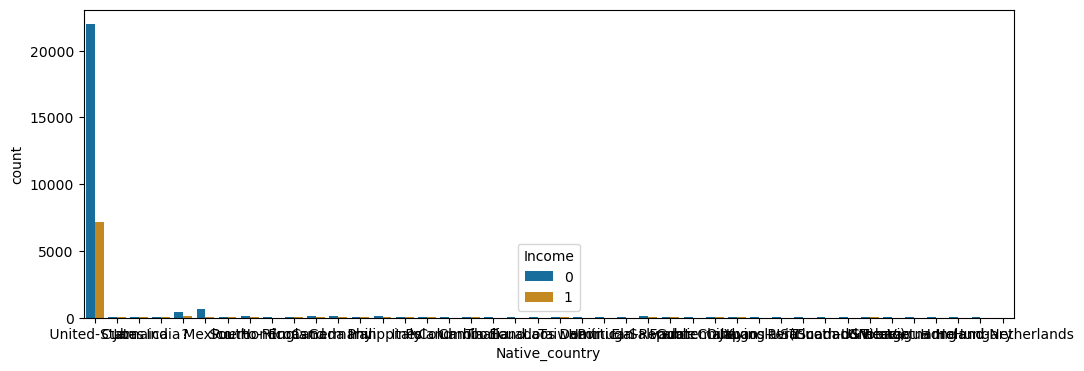

In [81]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Native_country", hue="Income", data=df, palette="colorblind")

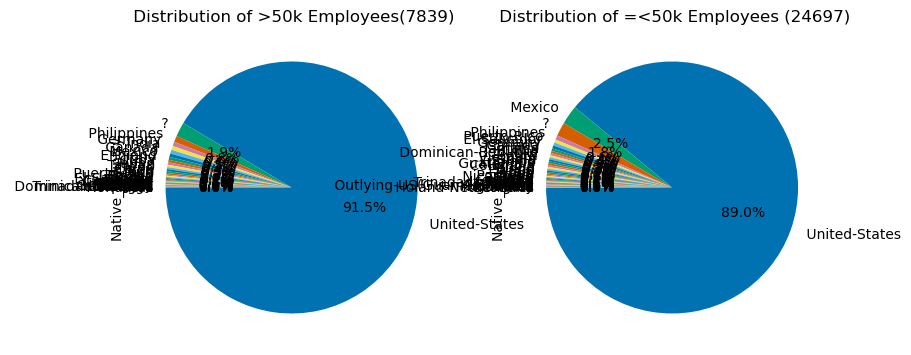

In [82]:
yes_group = df[df["Income"]!= 0]
no_group = df[df["Income"]== 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Native_country"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of >50k Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Native_country"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of =<50k Employees ('+str(len(no_group))+')');

## Encoding the categorical Features to numerical features

In [83]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [84]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [85]:
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
3                  40               5       0  
4                  40              39       0  
...               ...             ...     ...  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  
32559              40              39       1  

[32536 rows x 15 columns]

In [86]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int64
dtype: object

## Visualizing the relationship between the features and the  target variable - Attrition

In [87]:
#Divide data into features and label

x = df.drop(columns = ['Income'])
y = df['Income']

In [88]:
x

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  
0                  13              39  
1                  40              39  
2                  40              39  
3                  40               5  
4                  40              39  
...               ...             ...  
32555              38              39  
32556              40              39  
32557              40              39  
32558              20              39  
32559              40              39  

[32536 rows x 14 columns]

In [89]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int64

## Scatter plot

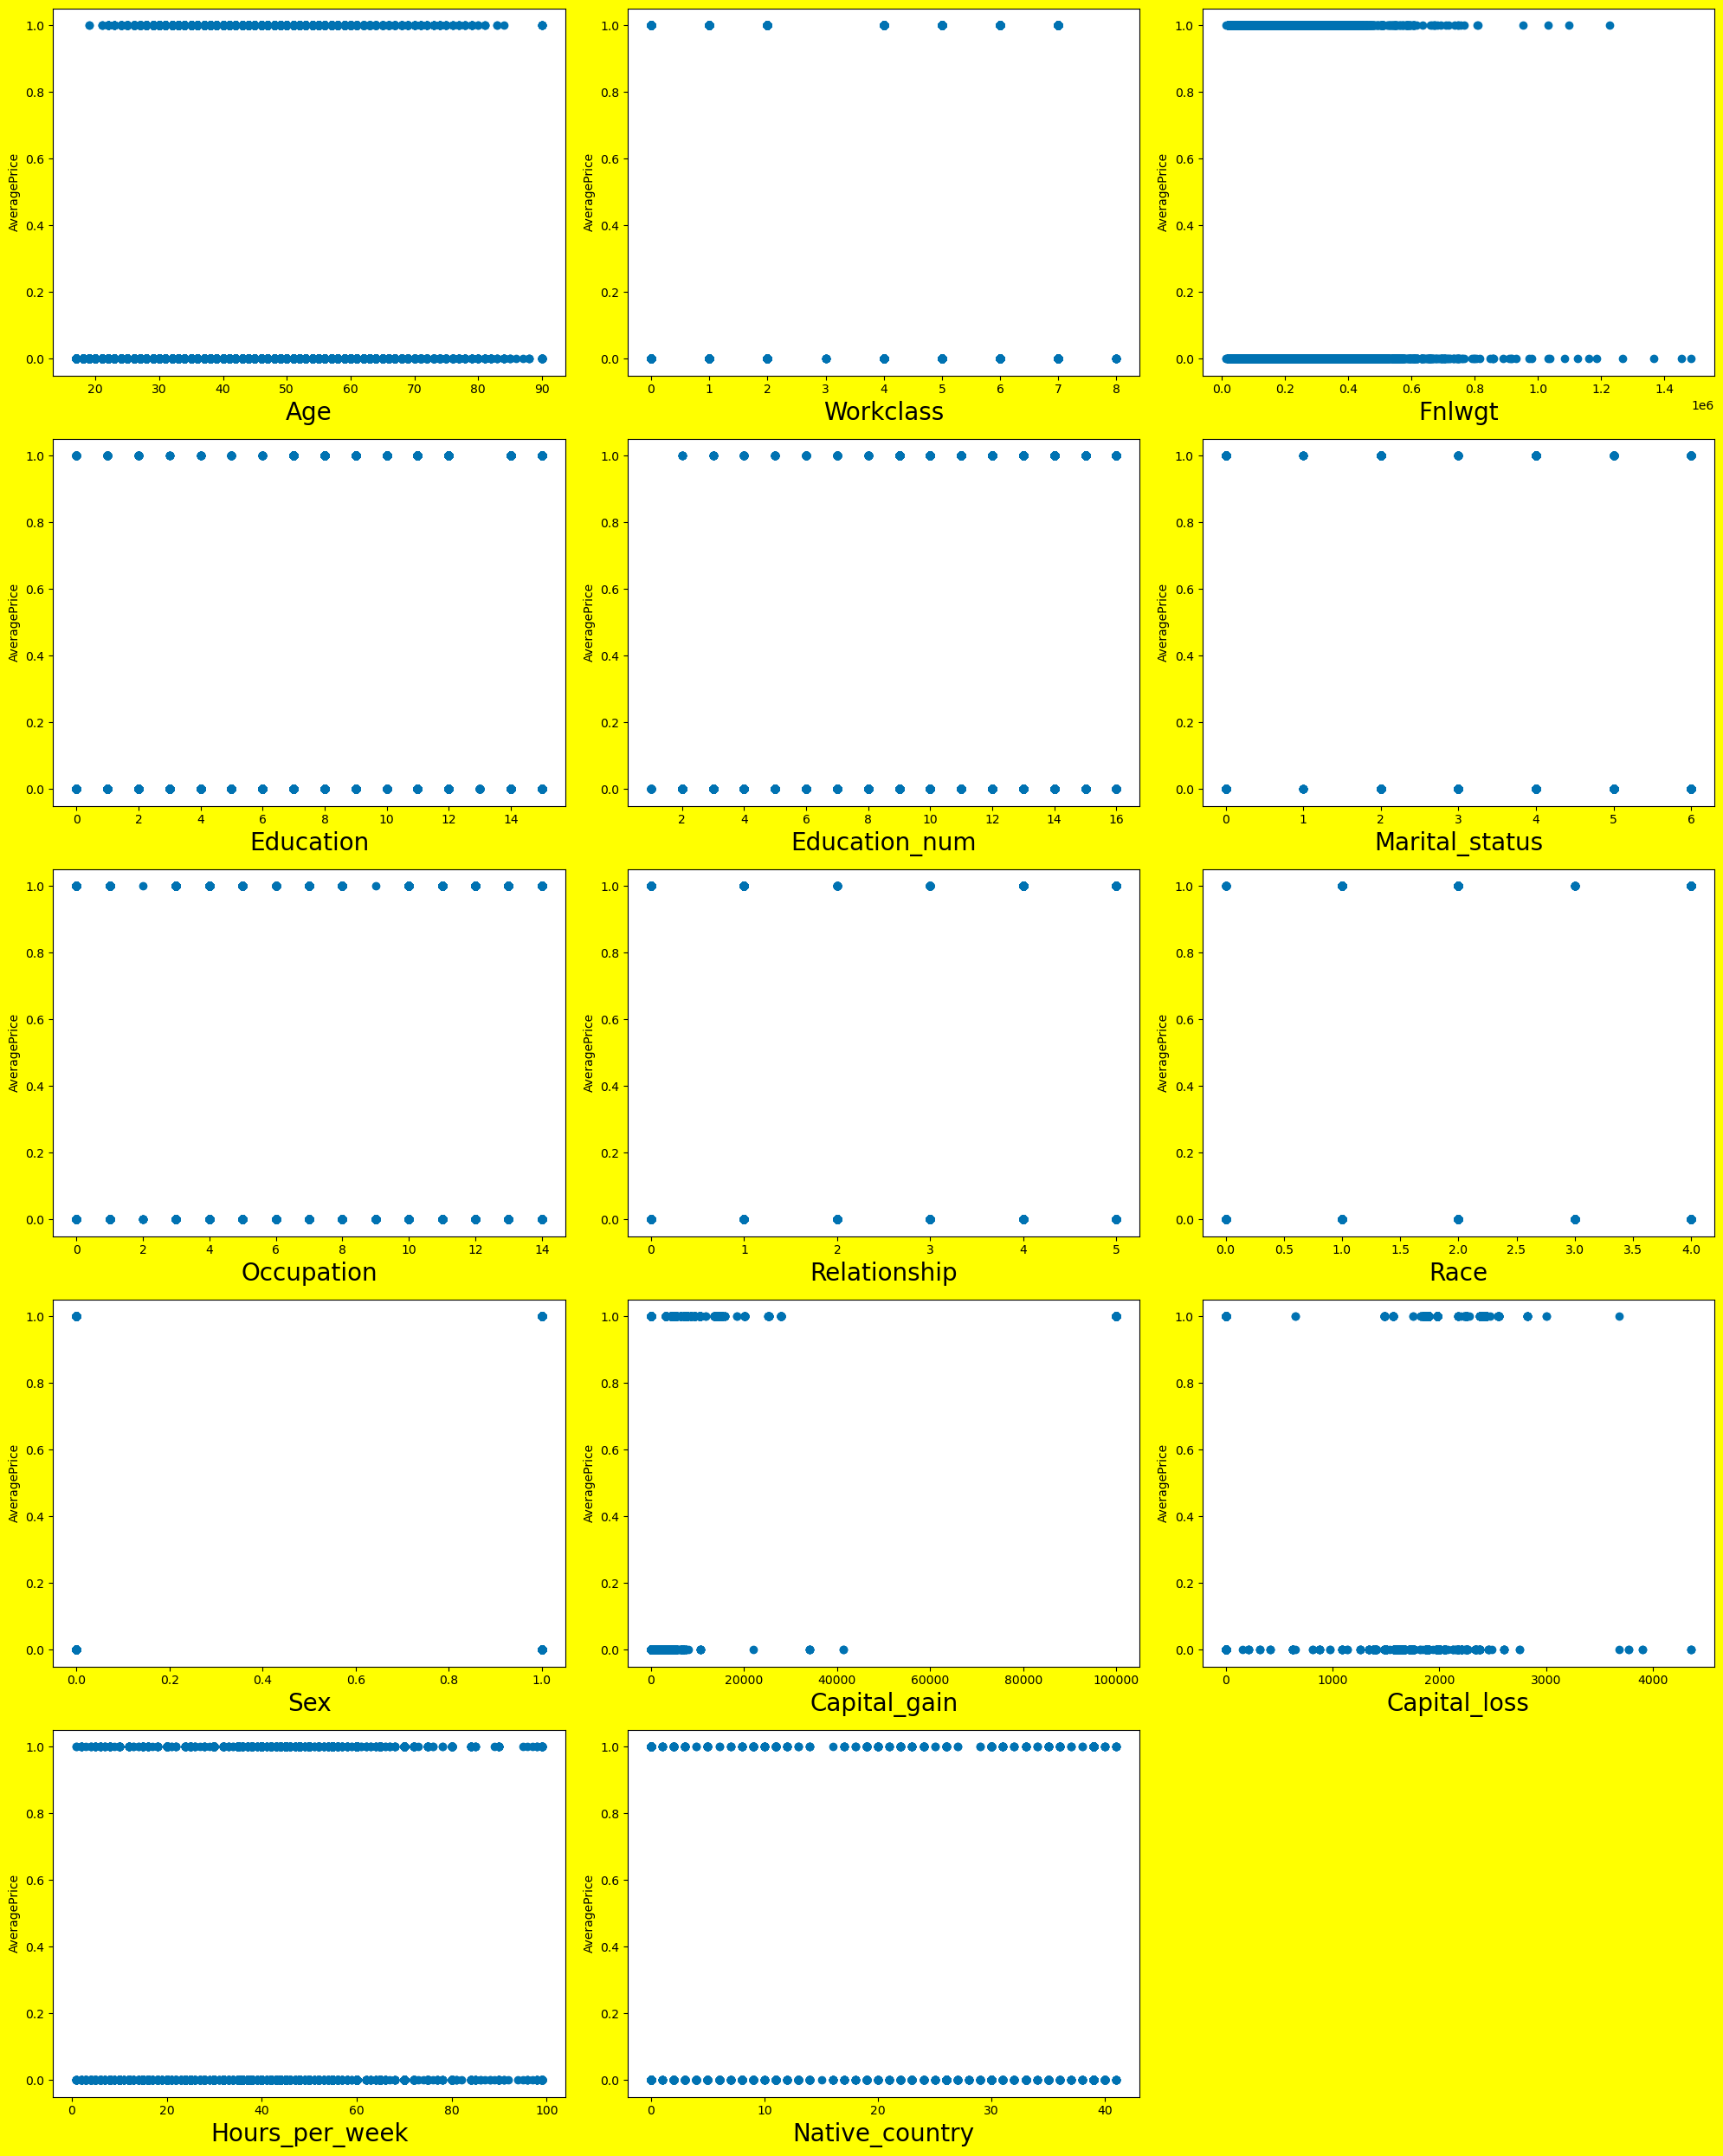

In [90]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(20,25), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


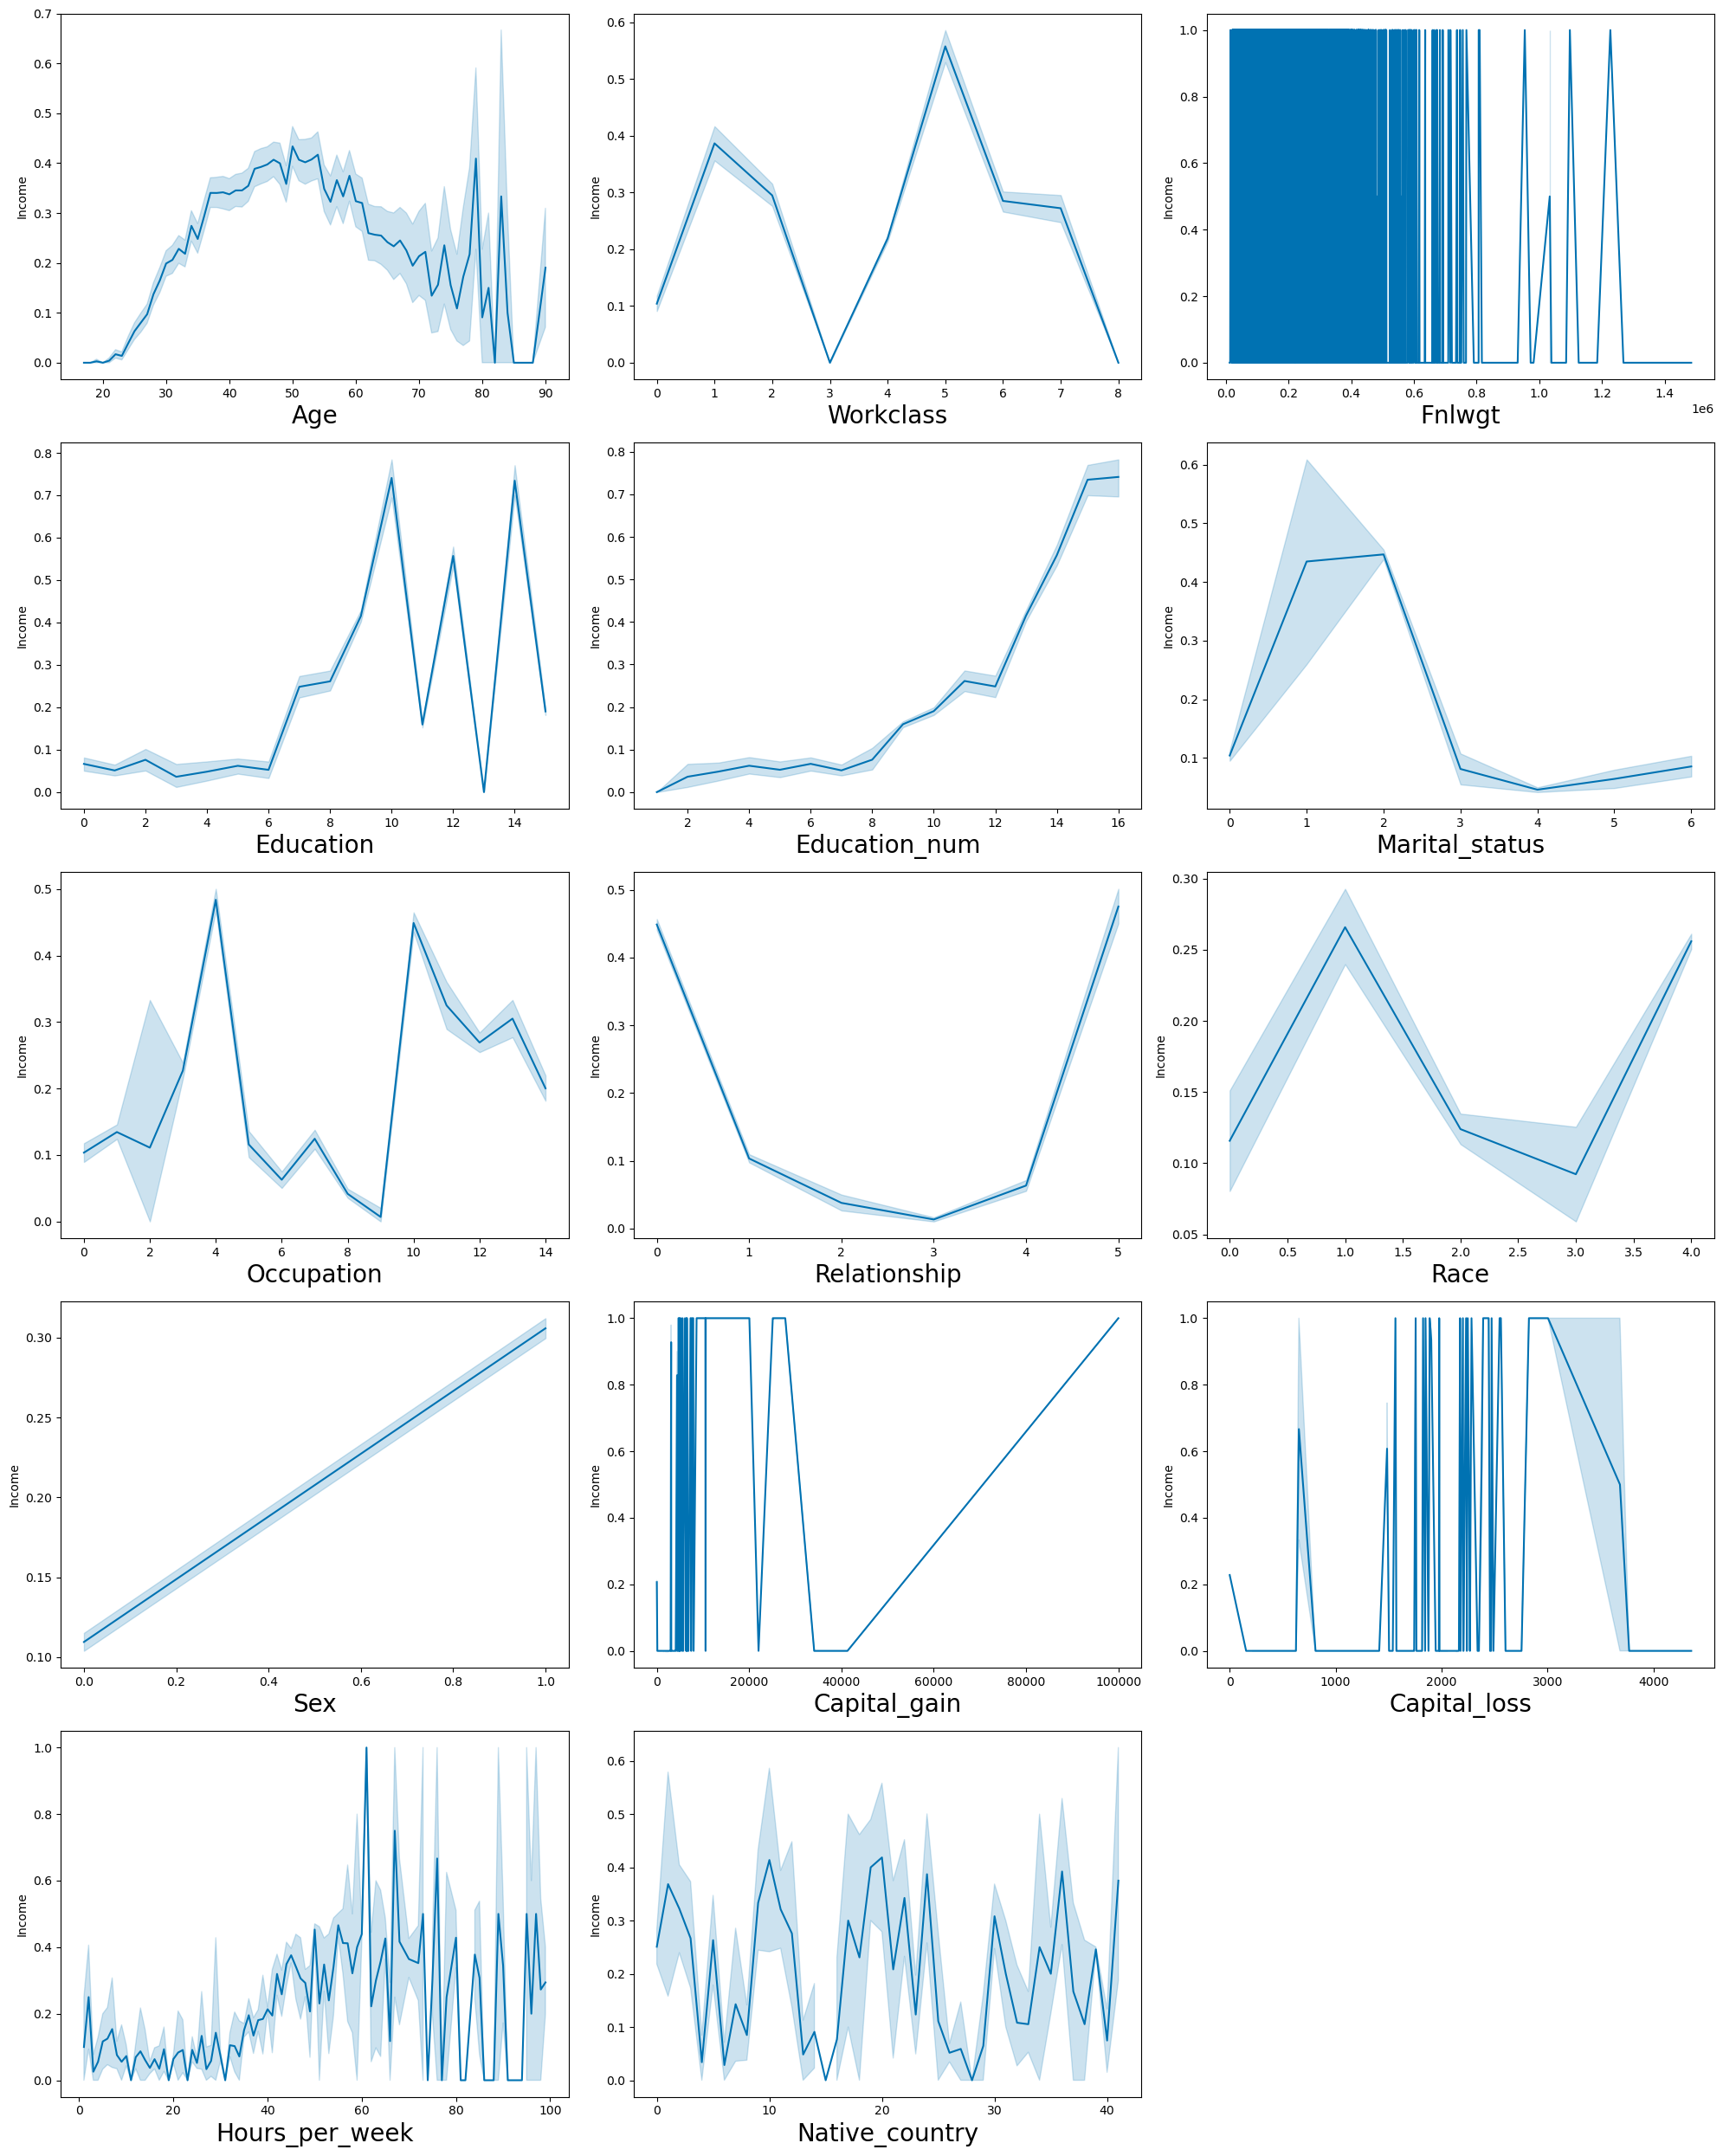

In [91]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Income',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

## EDA

### Describing the Dataset

In [92]:
df.describe()

Age     Workclass        Fnlwgt     Education  Education_num  \
count  32536.000000  32536.000000  3.253600e+04  32536.000000   32536.000000   
mean      38.585536      3.868638  1.897843e+05     10.297547      10.081725   
std       13.638193      1.456363  1.055563e+05      3.870195       2.571622   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178315e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.369932e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32536.000000  32536.000000  32536.000000  32536.000000  32536.000000   
mean         2.611384      6.573027      1.446552      3.665816      0.669228   
std          1.506304      4.229473      1.607087      0.848858      0.470498   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  \
count  32536.000000  32536.000000    32536.000000    32536.000000   
mean    1078.410069     87.370912       40.440343       36.721508   
std     7388.068465    403.107737       12.347079        7.820842   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             Income  
count  32536.000000  
mean       0.240933  
std        0.427656  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Visualization of the Data Properties


<AxesSubplot:>

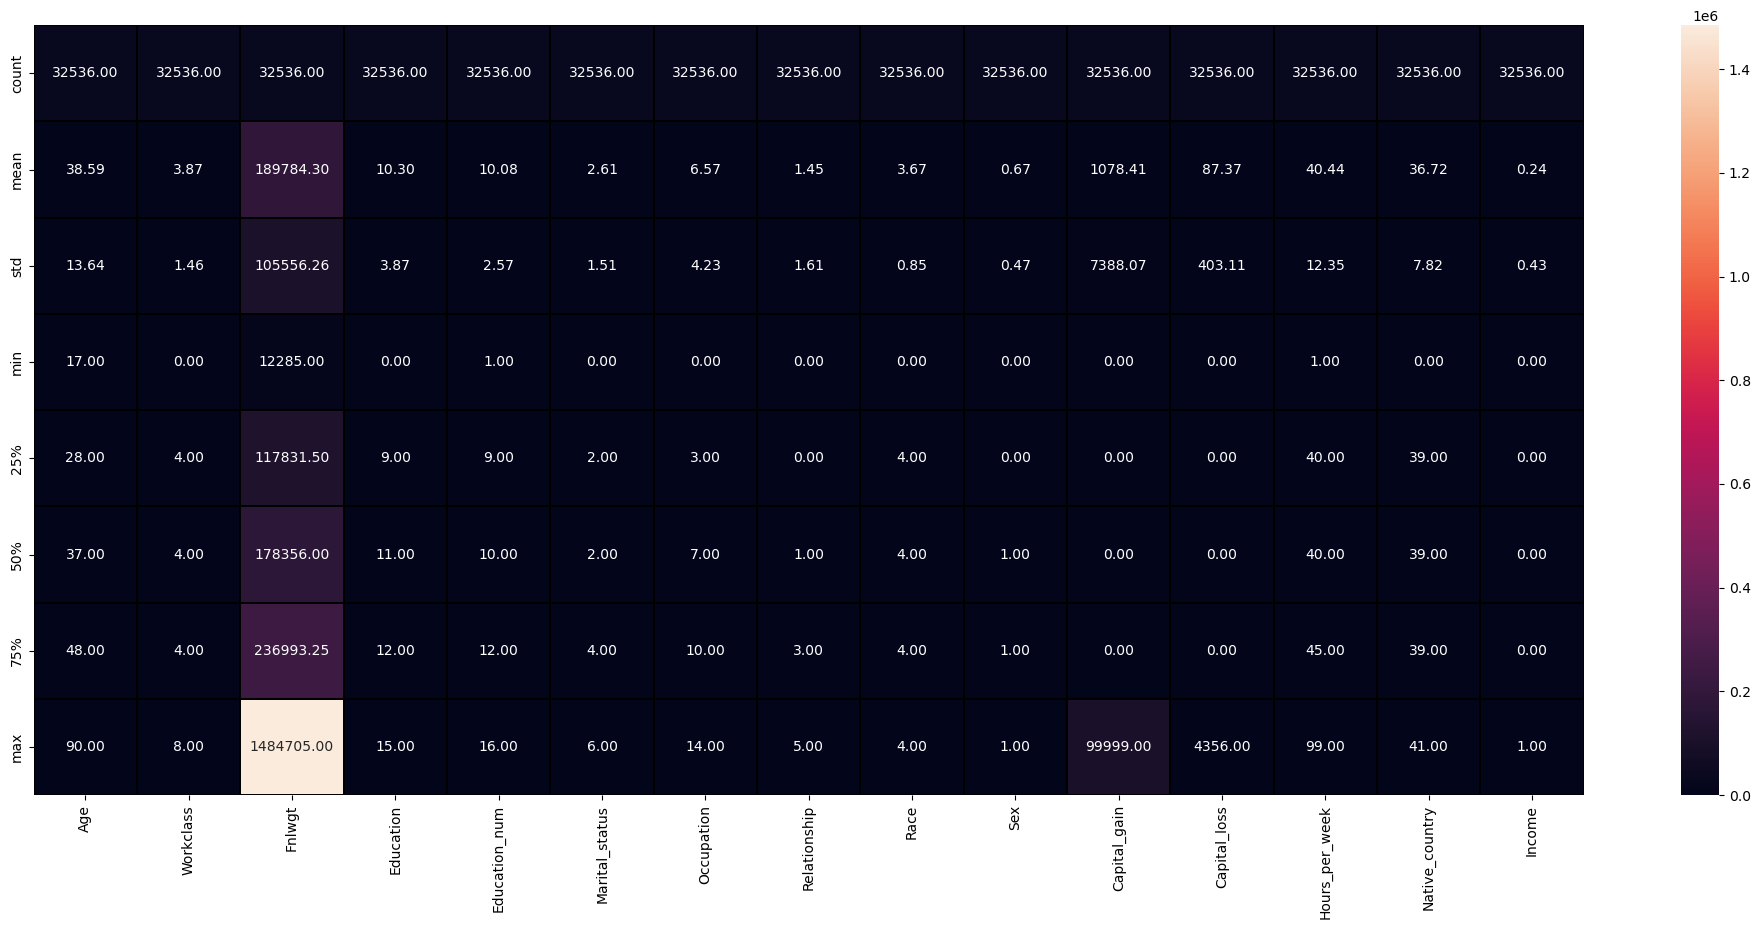

In [93]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

### We see that the same here we see fnlwgt has some extreme values need to scale the data after removing skewness


In [94]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [95]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=('Fnlwgt', 'Capital_gain', 'Capital_loss')

for col in skew:
    if df.skew().loc[col]> 0.55:
        df[col] = np.log1p(df[col])

In [96]:
df.skew()

Age               0.557657
Workclass        -0.751854
Fnlwgt           -0.842301
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.095326
Capital_loss      4.305624
Hours_per_week    0.228752
Native_country   -3.661060
Income            1.211640
dtype: float64

## we are first calculating the skew value and some of the column skew value are far from zero almost 13 so its diificult to make a good model with this.

- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
- In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

- Making the skewness value near to zero will help to get better score.

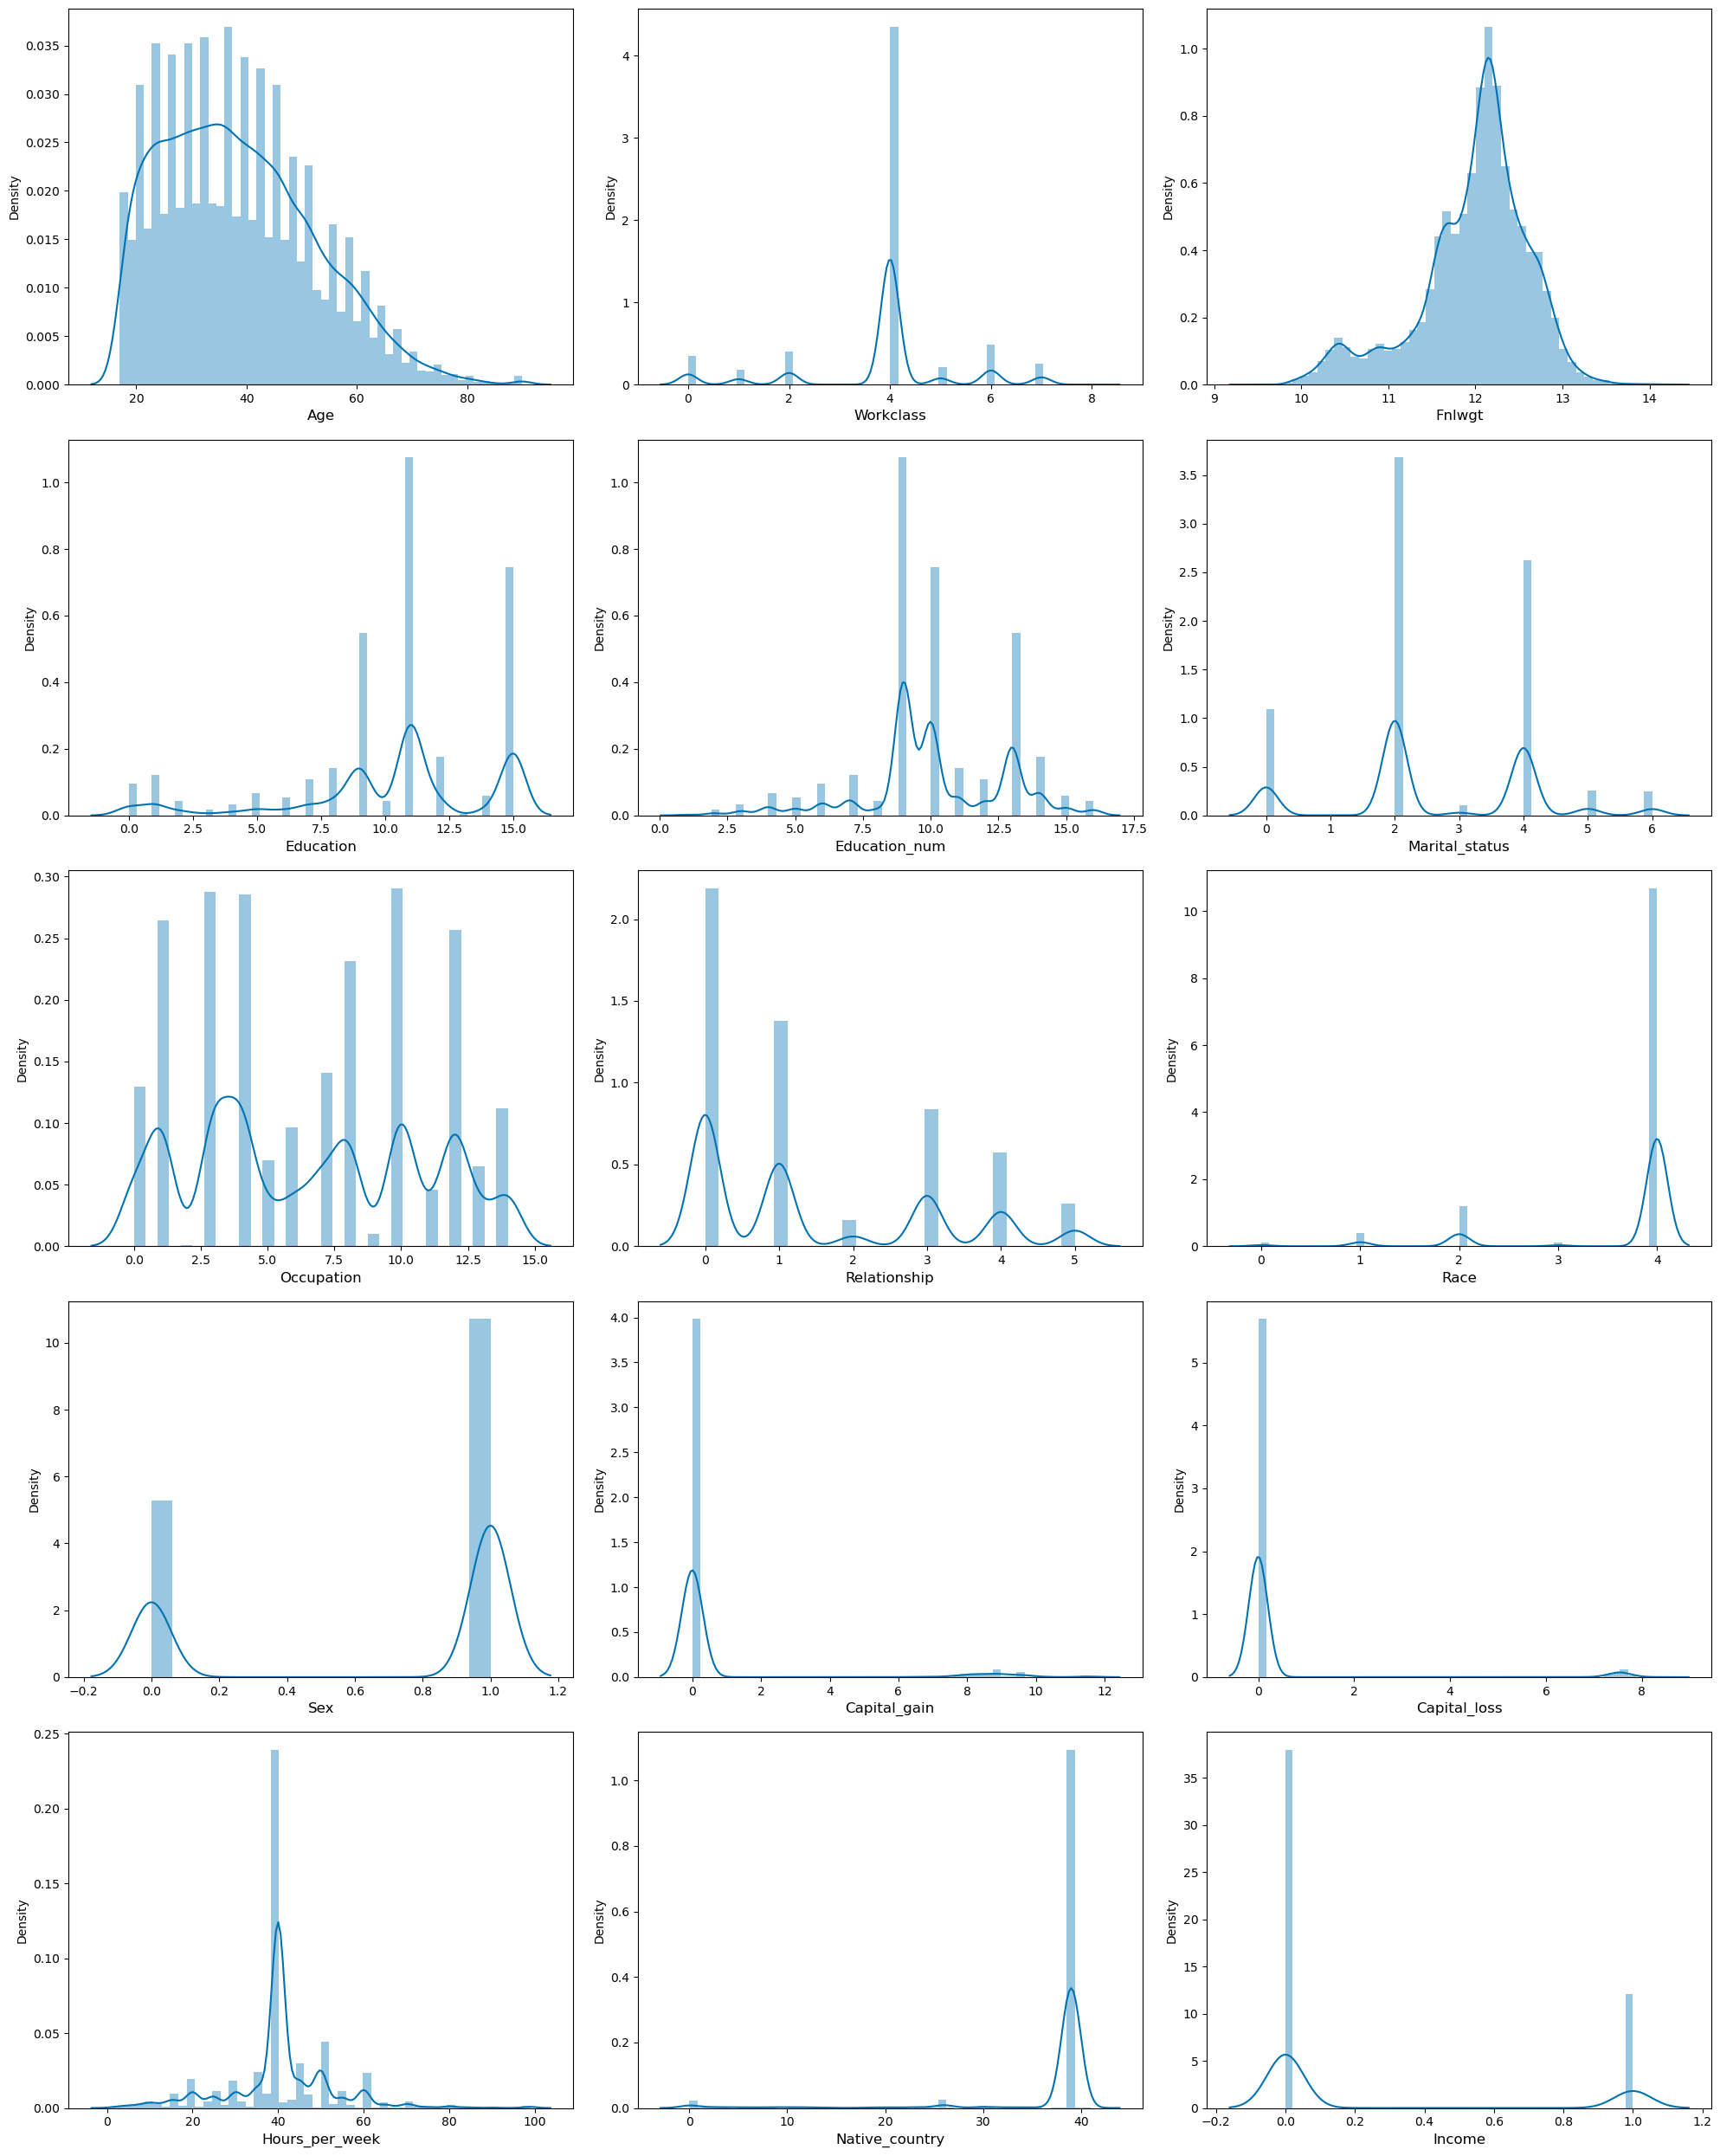

In [97]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

## Correlation of the columns with the  target variable -Income

In [98]:
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Fnlwgt           -0.001480
Native_country    0.015623
Workclass         0.051706
Race              0.071855
Occupation        0.075398
Education         0.079361
Capital_loss      0.141114
Sex               0.215984
Hours_per_week    0.229659
Age               0.234039
Capital_gain      0.289535
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

### We see that Education_num has the highest correlation with the target variable having a score of 0.34 which is the highest and Capital_gain is the 2nd Highest, 

Overall the rest of the columns show very less correaltion or negative correlation with the target . Same with the highest and the 2nd one as we dont have any feature giving above 50% impact



## Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

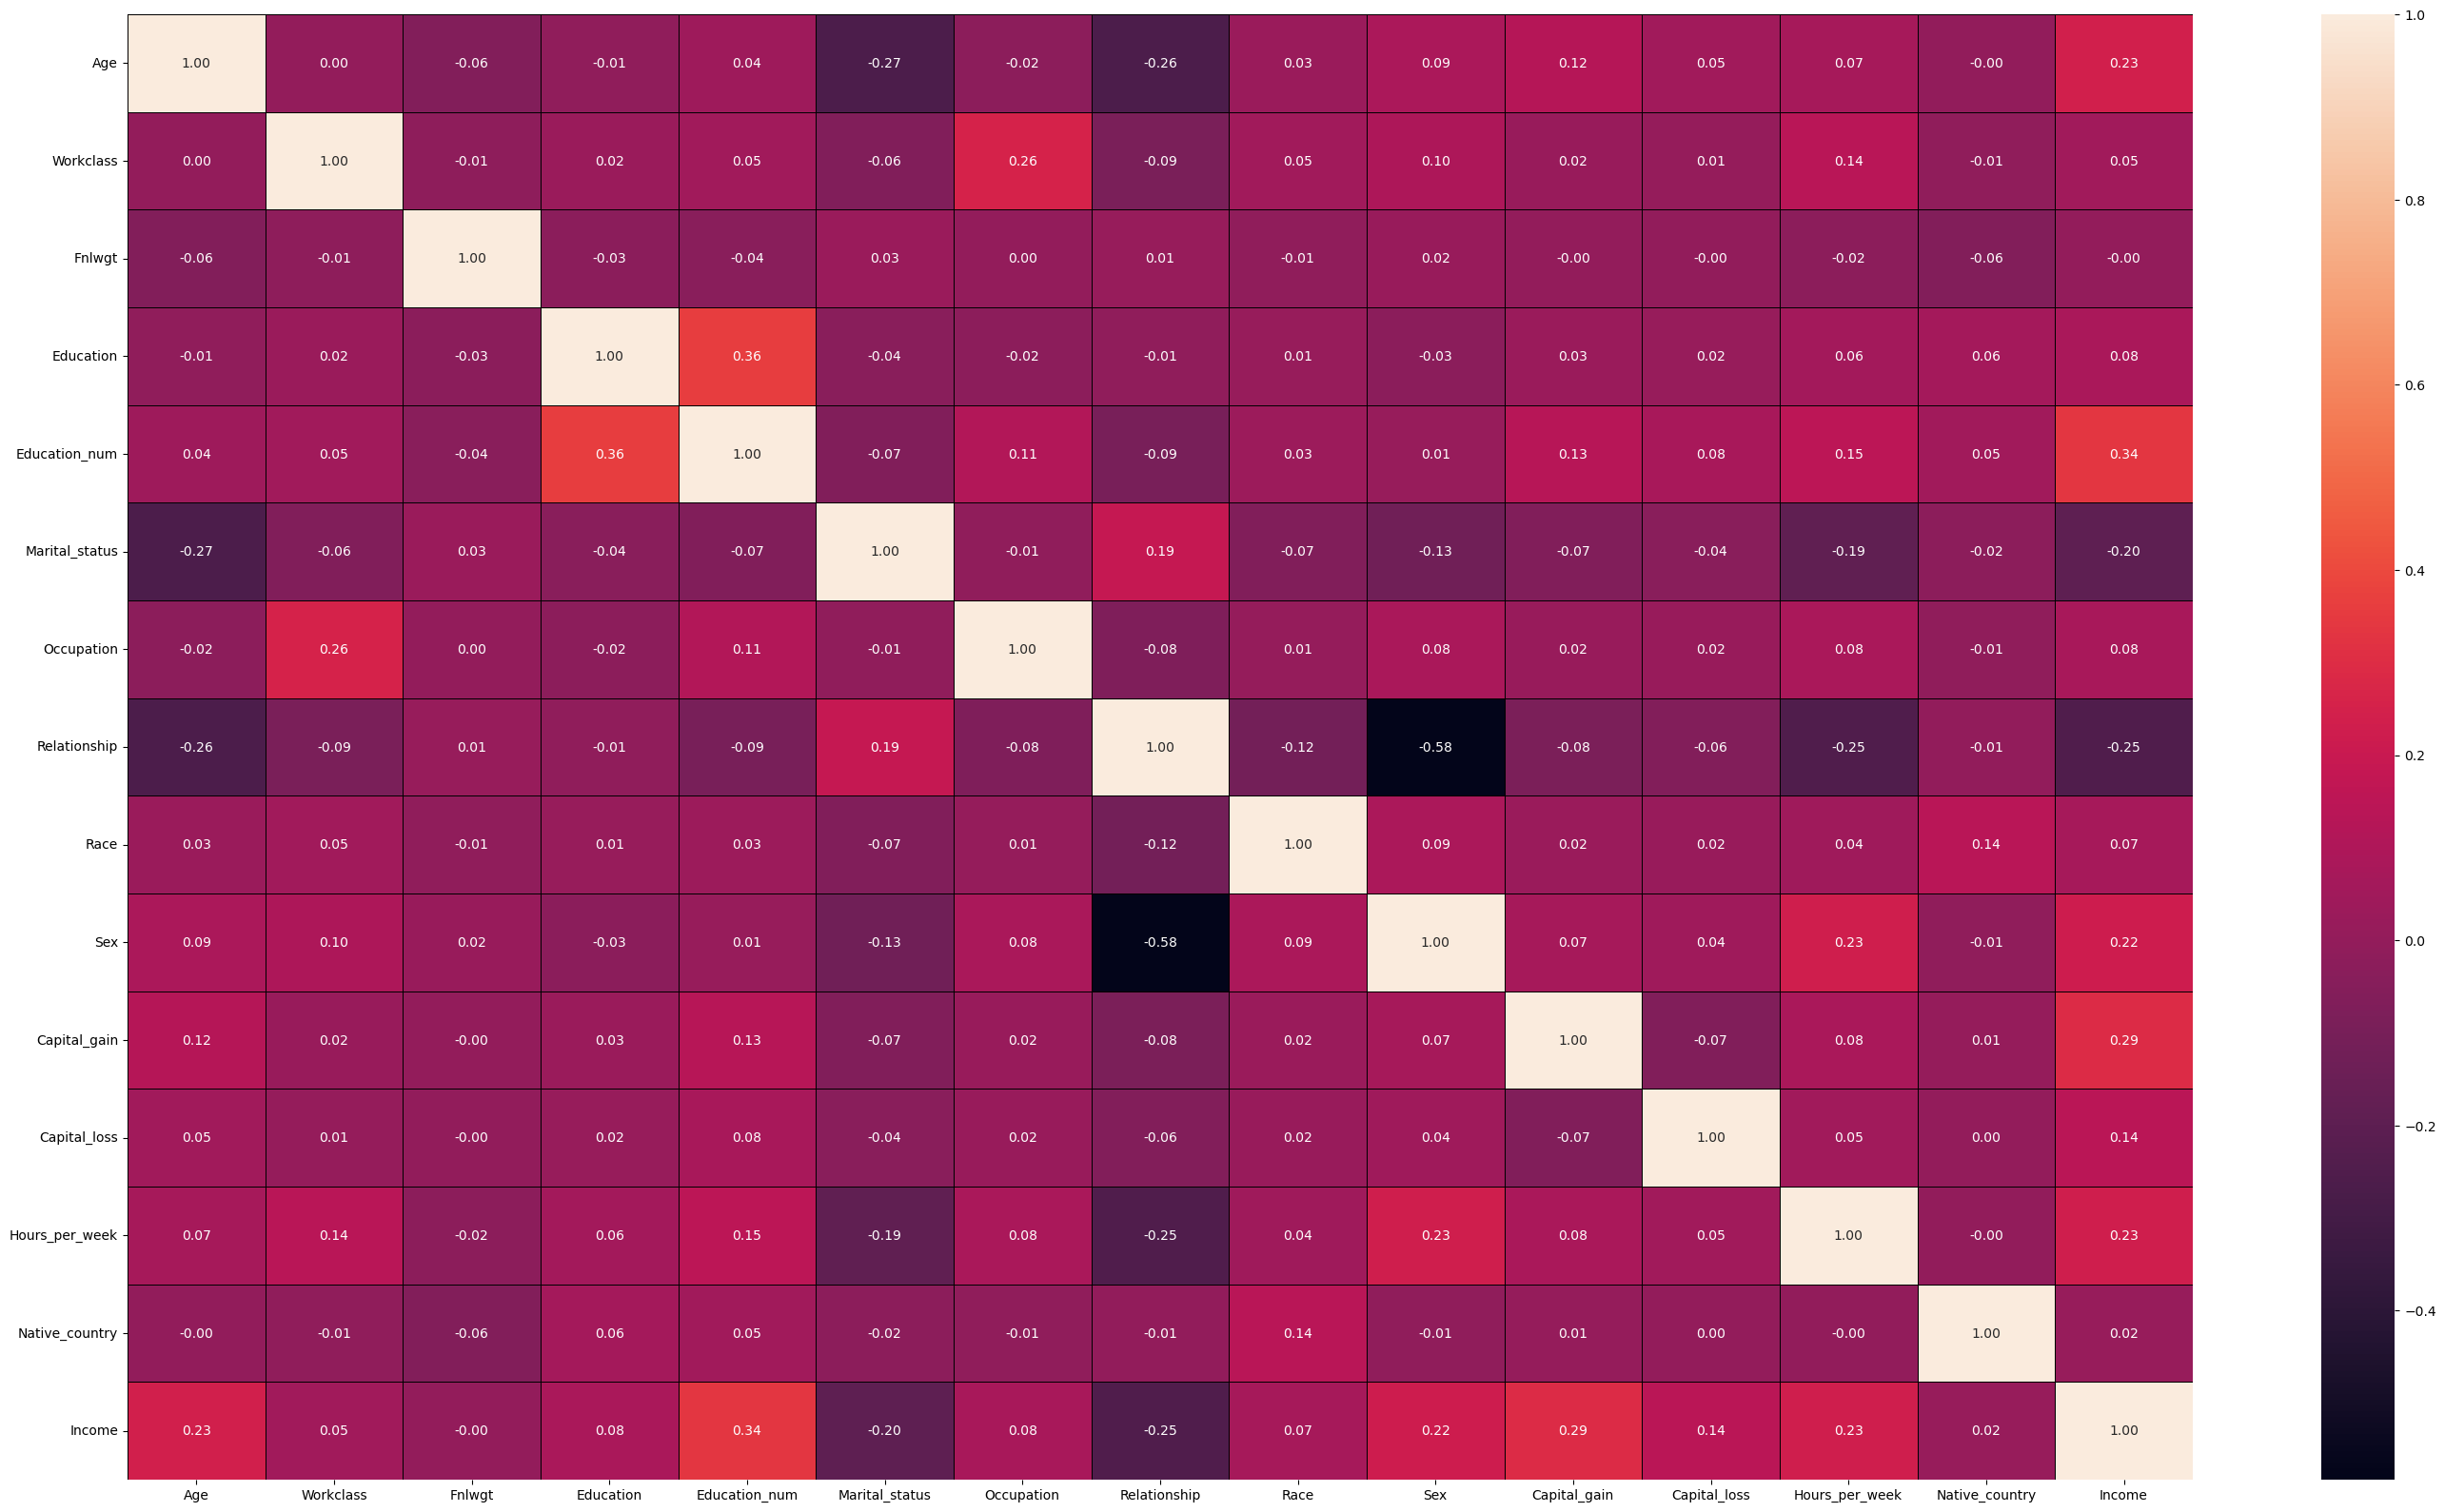

In [99]:
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

### Observations from the heatmap

- we see that there isnt multicollinearity problem in the data, some correlation between education and education_num is seen , but apart from that the rest of the features are not having  high correaltion

These are not having very high correlation and we want to use the data to see if it gives some much needed data to the model we are building

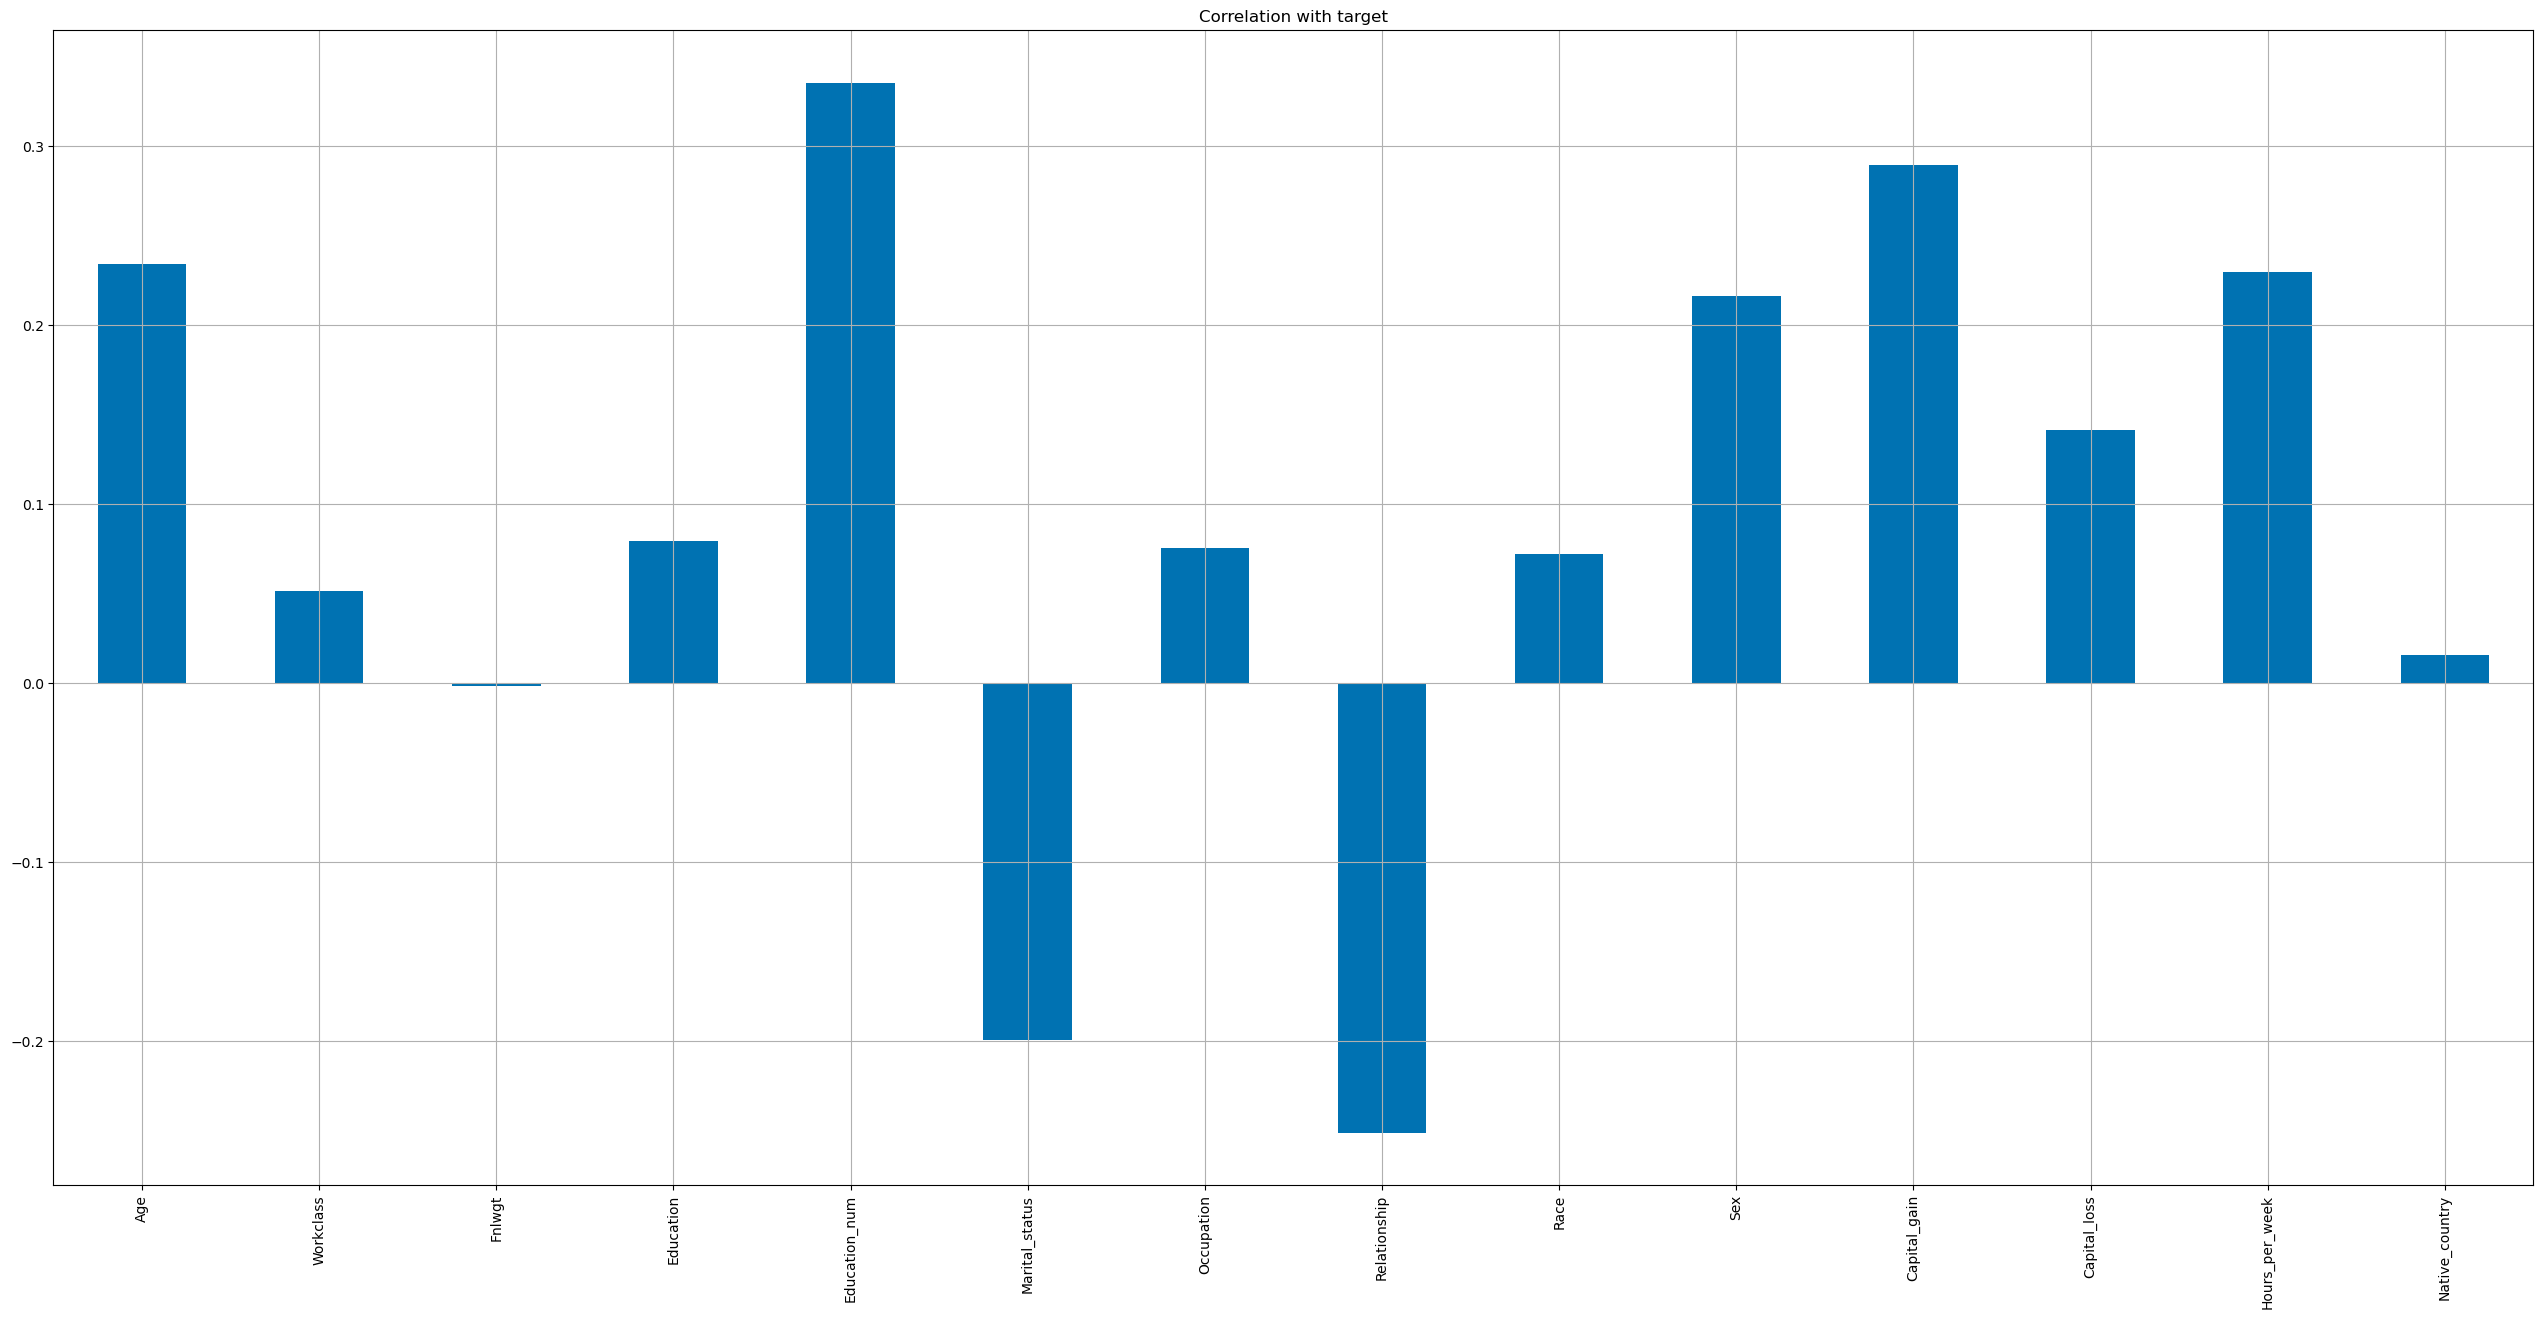

In [100]:
# Plotting a barplot to see th relationship with 1st label in a better way

df.drop('Income', axis=1).corrwith(df.Income).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

## Checking for Outliers

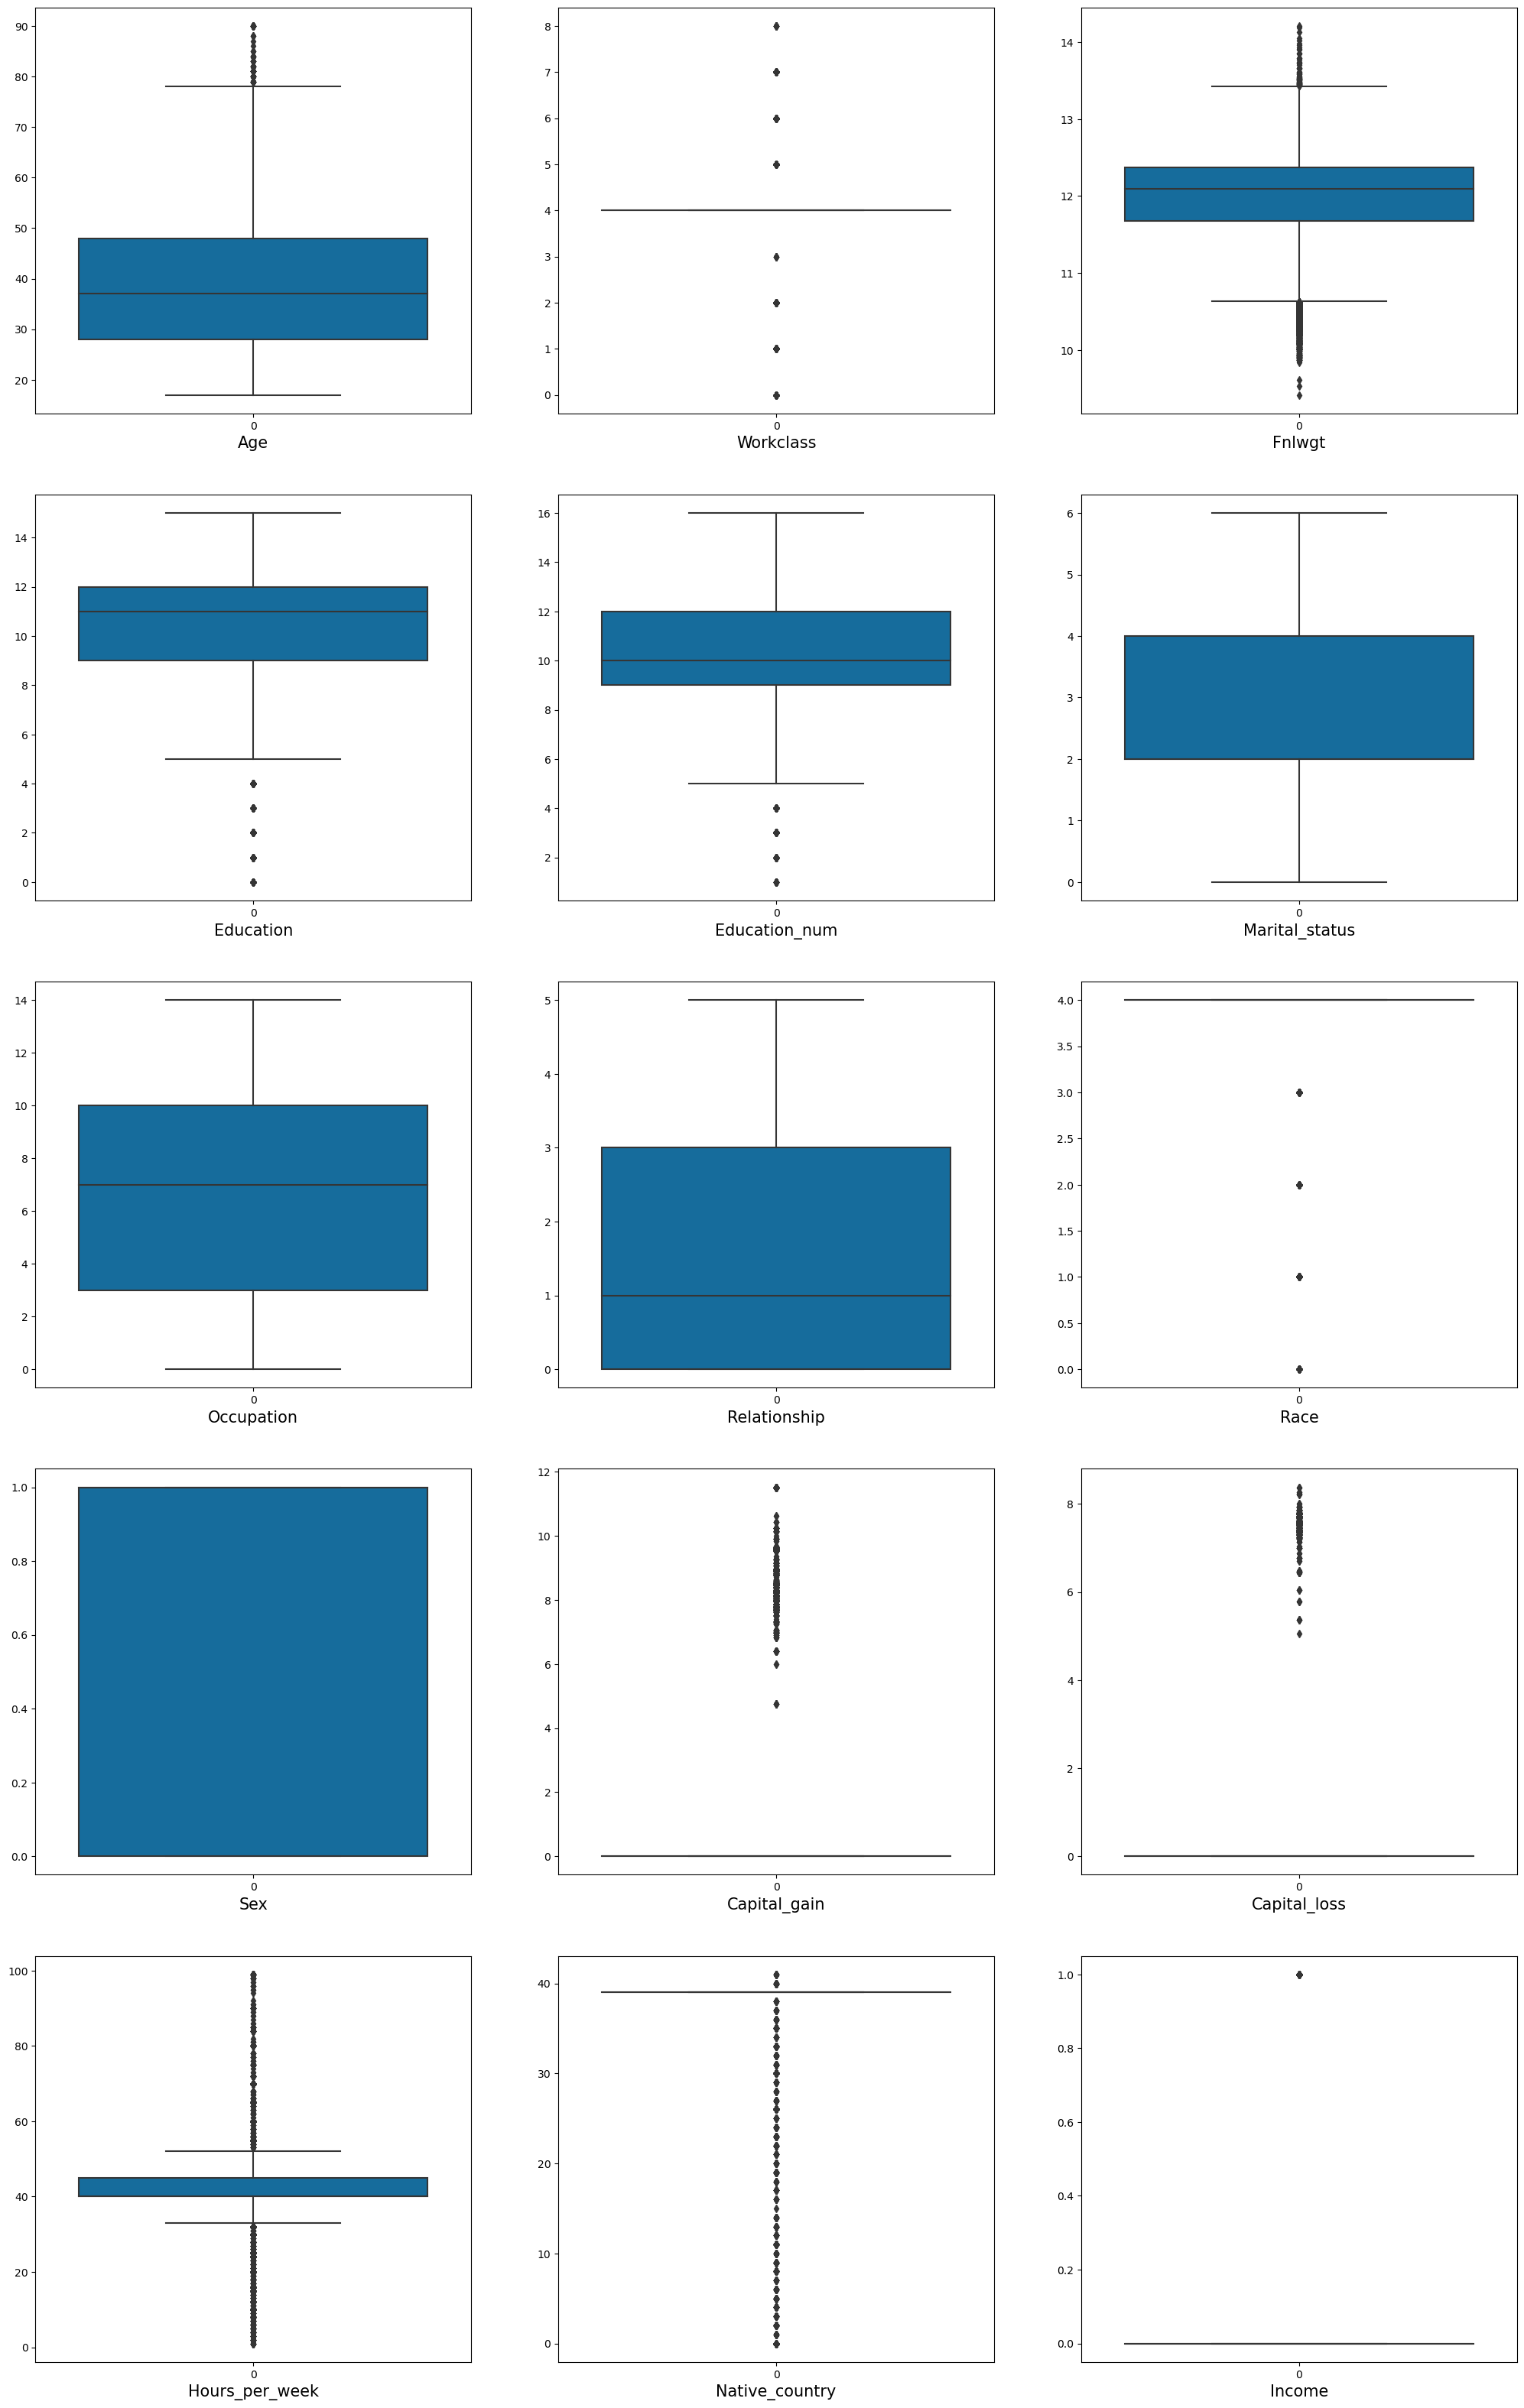

In [101]:
#Lets visualize the data
plt.figure(figsize =(25,40))
graph = 1

for column in df:
    if graph <=15: # as there are 9 columns in data
        plt.subplot(5,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

We see that all the numerical columns such as Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week have outliers , so we will use zscore to treat them and then scale the data

## Using SelectKBest Feature Selection Method - Target - Income

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [102]:
# Again we Divide data into features and label

X = df.drop(columns = ['Income'])
y = df['Income']

In [103]:
from sklearn.feature_selection import SelectKBest, f_classif

In [104]:
best_features = SelectKBest(score_func = f_classif, k=14)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(14,'Score'))  #Print Best 4 features

      Feature_name        Score
4    Education_num  4120.959861
10    Capital_gain  2976.906935
7     Relationship  2186.644675
0              Age  1885.286977
12  Hours_per_week  1811.486632
9              Sex  1591.944711
5   Marital_status  1344.129315
11    Capital_loss   661.021522
3        Education   206.203986
6       Occupation   186.010145
8             Race   168.848540
1        Workclass    87.213326
13  Native_country     7.943124
2           Fnlwgt     0.071301


### We see that the features Education_num as well as Capital_gain is the best  as the score they have are greater than 2900 approx which is really high, but we are only performing this step as a way to analyze the data even further , but we will not remove any columns as the data shows that most of the column is good for prediction 

## Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [105]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [106]:
X_scaled = mms.fit_transform(X)

In [107]:
X_scaled.shape

(32536, 14)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

vif        Features
0    3.711330             Age
1    8.477595       Workclass
2   14.224085          Fnlwgt
3    9.180463       Education
4   15.511091   Education_num
5    4.090827  Marital_status
6    3.712076      Occupation
7    2.702428    Relationship
8   17.712713            Race
9    4.487899             Sex
10   1.137198    Capital_gain
11   1.068646    Capital_loss
12  11.655469  Hours_per_week
13  19.574763  Native_country

We see the same columns whichwe have seen the outliers have now shown that they have a very high VIF score which we need to treat before we can go into model building 

## Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA()

In [111]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-0.42615104,  0.15422268, -0.09707448, ..., -0.20268754,
         0.06558483, -0.36700784],
       [-0.36857478,  0.07772353, -0.16293015, ...,  0.08577566,
        -0.05631456, -0.03786395],
       [-0.41869094,  0.11330811,  0.40816515, ..., -0.01908969,
        -0.0943298 , -0.00510614],
       ...,
       [ 0.89093079,  0.32702405,  0.15173509, ..., -0.06071664,
        -0.02600939,  0.1206213 ],
       [-0.05461119,  0.42036056,  0.32361893, ...,  0.03546461,
        -0.04277522, -0.16906722],
       [ 0.86282061,  0.07094297, -0.2037083 , ...,  0.1589016 ,
        -0.12759858,  0.04516601]])

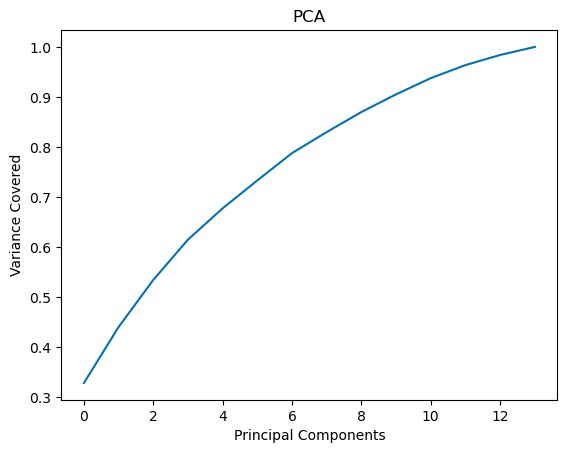

In [112]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

### We see that in order to cover 95% - 100% of the data we need to have only have 10 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we should remove any feautes , But at this pont we will move ahead as all the columns constitute to making the model better "


## Using Zscore to deal with the outliers in the data

In [113]:
df.shape

(32536, 15)

In [114]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     7,     8, ..., 32526, 32528, 32535], dtype=int64),
 array([13, 10, 10, ...,  8,  8, 10], dtype=int64))

In [115]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

Age  Workclass     Fnlwgt  Education  Education_num  Marital_status  \
0       50          6  11.330348          9             13               2   
1       38          4  12.281398         11              9               0   
2       53          4  12.366157          1              7               2   
4       37          4  12.558780         12             14               2   
5       49          4  11.984103          6              5               3   
...    ...        ...        ...        ...            ...             ...   
32554   22          4  12.644821         15             10               4   
32555   27          4  12.458010          7             12               2   
32556   40          4  11.947140         11              9               2   
32557   58          4  11.931050         11              9               6   
32558   22          4  12.213500         11              9               4   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1           0.0           0.0   
1               6             1     4    1           0.0           0.0   
2               6             0     2    1           0.0           0.0   
4               4             5     4    0           0.0           0.0   
5               8             1     2    0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
32554          11             1     4    1           0.0           0.0   
32555          13             5     4    0           0.0           0.0   
32556           7             0     4    1           0.0           0.0   
32557           1             4     4    0           0.0           0.0   
32558           1             3     4    1           0.0           0.0   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
4                  40              39       0  
5                  16              23       0  
...               ...             ...     ...  
32554              40              39       0  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  

[25836 rows x 15 columns]

In [116]:
df_new_z.shape

(25836, 15)

In [117]:
#Percentage of Data loss

Data_loss = ((32536-25836)/32536)*100

In [118]:
Data_loss

20.59257437914925

We have lost 20.59% of the data as we have to remove the skewness which occured due to outliers so that the model is not biased towards it

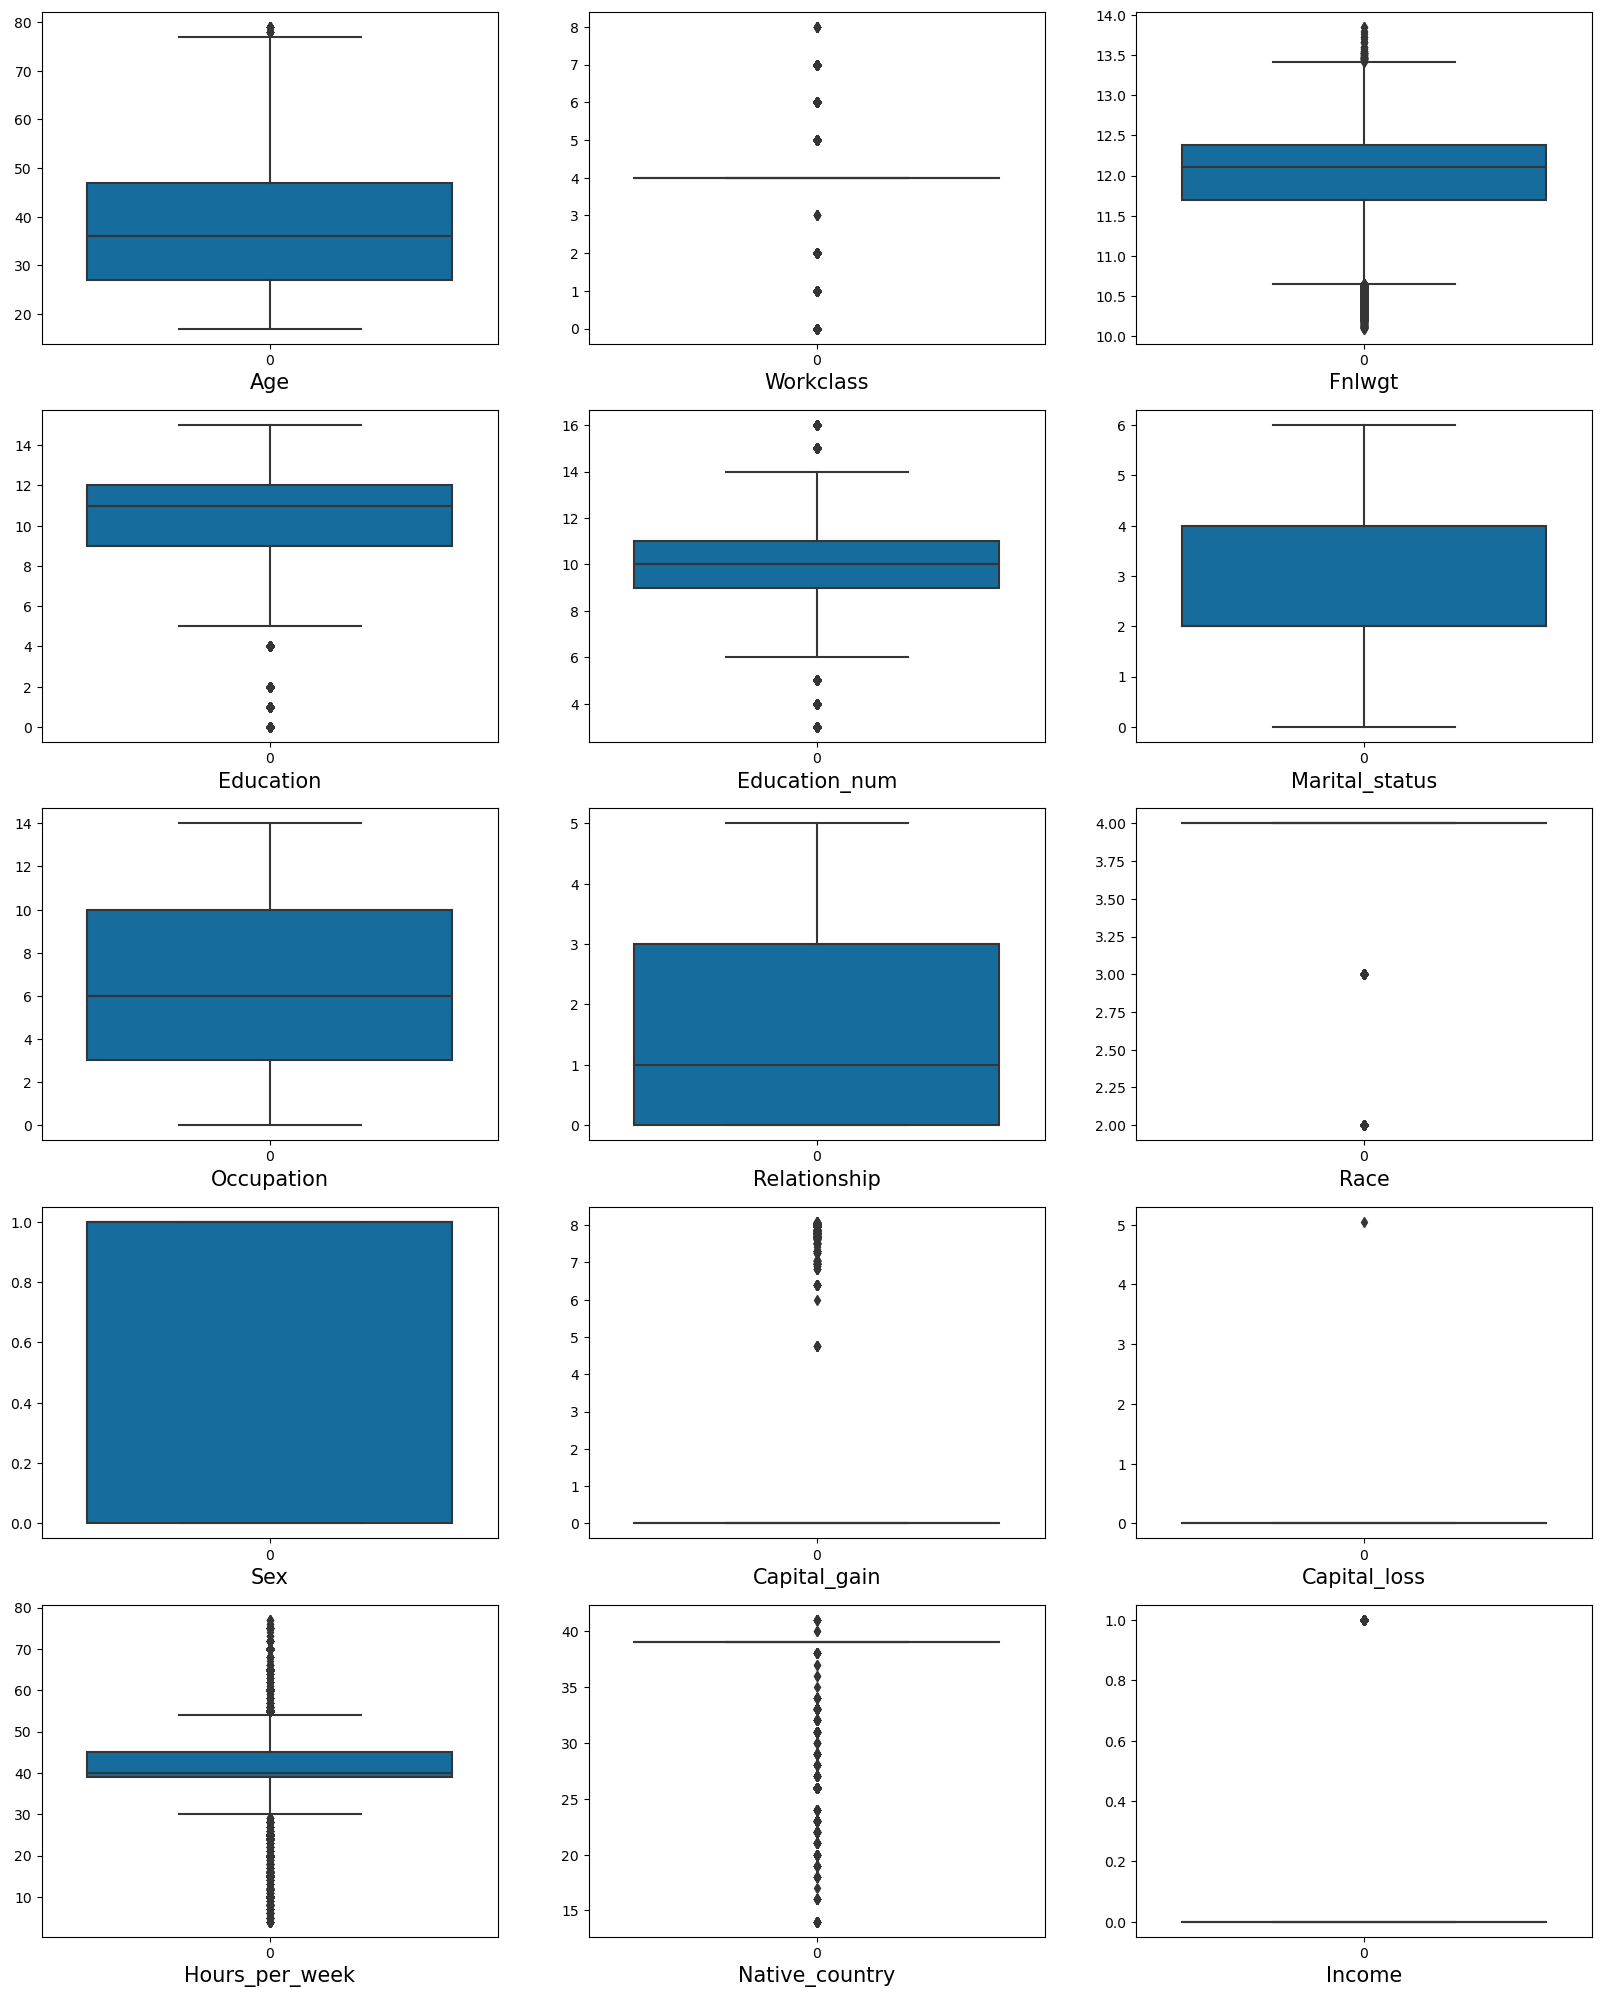

In [119]:
#Lets visualize the data
plt.figure(figsize =(20,25))
graph = 1

for column in df_new_z:
    if graph <=15: # as there are 9 columns in data
        plt.subplot(5,3,graph)
        ax=sns.boxplot(data=df_new_z[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

After  treating with Zscore we see much better data , the only columns we see there is some outliers are the categorical columns like hours_per_week as well as education_num and mainly Native _Country which we cannot do anything for as we need all the data  

## Logistic Regression

In [120]:
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 76)

In [121]:
lr=LogisticRegression()


scores=[]
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train_ns,y_train_ns)
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')
    scores.append(accuracy_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.8146873207114171
At random state 0,the Testing accuracy is :-0.8069830341775265


At random state 1,the training accuracy is :-0.8157528071469552
At random state 1,the Testing accuracy is :-0.8057536267519055


At random state 2,the training accuracy is :-0.8132530120481928
At random state 2,the Testing accuracy is :-0.8119006638800098


At random state 3,the training accuracy is :-0.8131710515531514
At random state 3,the Testing accuracy is :-0.8112859601671994


At random state 4,the training accuracy is :-0.8118187033849684
At random state 4,the Testing accuracy is :-0.8170641750676174


At random state 5,the training accuracy is :-0.8134169330382756
At random state 5,the Testing accuracy is :-0.812023604622572


At random state 6,the training accuracy is :-0.8132939922957134
At random state 6,the Testing accuracy is :-0.8139906565035653


At random state 7,the training accuracy is :-0.8121875256126547
At random state 7,the Testing accu

At random state 63,the training accuracy is :-0.8148512417014999
At random state 63,the Testing accuracy is :-0.8082124416031473


At random state 64,the training accuracy is :-0.8132939922957134
At random state 64,the Testing accuracy is :-0.810671256454389


At random state 65,the training accuracy is :-0.8129661503155479
At random state 65,the Testing accuracy is :-0.8112859601671994


At random state 66,the training accuracy is :-0.8137037947709204
At random state 66,the Testing accuracy is :-0.8132530120481928


At random state 67,the training accuracy is :-0.8147692812064585
At random state 67,the Testing accuracy is :-0.8112859601671994


At random state 68,the training accuracy is :-0.8118596836324892
At random state 68,the Testing accuracy is :-0.8150971231866241


At random state 69,the training accuracy is :-0.8129251700680272
At random state 69,the Testing accuracy is :-0.8146053602163758


At random state 70,the training accuracy is :-0.8151381034341447
At random state 70,

In [122]:
np.argmax(scores)

62

In [123]:
scores[np.argmax(scores)]

0.822227686255225

### We see that this model work well with the data , we see that the scores are greater than 80% :-
    
    - we are getting 
     
    At random state 98,the training accuracy is :-0.813498893533317

    At random state 98,the Testing accuracy is :-0.8117777231374478

- the training score and Testing score are really close to each other here
- both the train and test score are really good but we will test more an also th cv score to see if its consistent  


## Train Test Split

In [124]:
X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 98) 

# as the best random state we have chosen is 98

### We are creating a method called Metric to allow us to show the metrics of each classification model we use , so we dont have to code it again 

In [125]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
    
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [126]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  81.37%

===============================Test Result===============================
Accuracy Scorre :  81.35%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      6159
           1       0.68      0.43      0.53      1975

    accuracy                           0.81      8134
   macro avg       0.76      0.68      0.71      8134
weighted avg       0.80      0.81      0.80      8134



### We see that this model is having a pretty good score in Logistic regression , we see the train score as 81.39% and the test score as 81.33% which is pretty good considering that this is actually a downsize dataset and we have also done balancing of the label category due to imbalance 

We see that precision score is 84& for 0 and 68% for 1 , and avg is 76% F1 score is 81% equal to test

In [127]:
print(confusion_matrix(y_test,pred_test))  

[[5194  965]
 [1658  317]]


## Cross-Validation of the model

In [128]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.8131300713056306 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold3 the cv score is 0.8133761196363775 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold4 the cv score is 0.8127305138923039 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold5 the cv score is 0.8126691892207427 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold6 the cv score is 0.8130995614377867 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold7 the cv score is 0.812791984263585 and accuracy score for training is 0.682075239734448and the accuracy for testing is 0.6775264322596508


At cross fold8 the cv score is 0.812853454634866 and accuracy score for

## Decision Tree Classifier

In [129]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 98) #as we have seen a good score on 98th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {98},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {98},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


At random state 98,the training accuracy is :-1.0
At random state 98,the Testing accuracy is :-0.8100565527415785




In [130]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  81.01%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      6159
           1       0.61      0.62      0.61      1975

    accuracy                           0.81      8134
   macro avg       0.74      0.74      0.74      8134
weighted avg       0.81      0.81      0.81      8134



In [131]:
print(confusion_matrix(y_test,pred_test)) 

[[5374  785]
 [ 760 1215]]


## Observations from the Decision Tree Classifier :-
    - We see that the training score is boosted all the way to 100% which is the highest  but the testing score is fallen short  @ 81.13% which is lesser than the logistic model but a slight decimal only  , also we see that the F1 score is the same as test score for accuracy and precision is 74% for 0 and only 81% for 1 which is same than the last model 
    
    - the model is not performing as good as Logistic regression but we cant use this model moving to check the cv score

In [132]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.8073211212195721 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold3 the cv score is 0.8126075888542958 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold4 the cv score is 0.8103024342267027 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold5 the cv score is 0.8073826173109022 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold6 the cv score is 0.81054845409705 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold7 the cv score is 0.8107941971969509 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold8 the cv score is 0.8085197934595525 and accuracy score for training is 1.0and the accuracy for testing is 0.8100565527415785


At cross fold9 

## KNN Classifier

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=3)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 80.72289156626506
Cross Val Score : 80.54463227036935
[[5438  721]
 [ 847 1128]]


In [134]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  86.37%

===============================Test Result===============================
Accuracy Scorre :  80.72%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      6159
           1       0.61      0.57      0.59      1975

    accuracy                           0.81      8134
   macro avg       0.74      0.73      0.73      8134
weighted avg       0.80      0.81      0.81      8134



## Observations from the KNN Classifier :-
    - We see that the training score is lesser than Decision tree @ 86.37%   but the testing score good but slightly lesser than the logistic regression as well as Decision tree
    
    we see that the F1 score is the same  where accuracy for 0 is 987% and for 1 is 59% which is bad 
    
    - the CV score is good though and very similar to the test accuracy @ 80.72% , so overall the model is ok , but we need to improve the f1 score and precision
    
    - we see the confusion matrix where the typ 1 and typ 2 error is horribly very high and we nned to test other models 

## Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=8)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 85.88640275387263
Cross Val Score : 85.60363904597983
[[5749  410]
 [ 738 1237]]


In [136]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  85.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6159
           1       0.75      0.63      0.68      1975

    accuracy                           0.86      8134
   macro avg       0.82      0.78      0.80      8134
weighted avg       0.85      0.86      0.85      8134



## Observations from the Random Forest Classifier :-
    - We see that like the decision tree the train score is at the max at 100% and we have test score much better at 85.91% , the F1 score is at 86% and precisiion @ 81% which is a good model and the best till now , we have imbalance dataset and we treated so we have a little higher Cv score of 85.70% approx so we are getting a good cv score as well which is on par with the test sore which is what we need the model to do 
    
    - the model has higher errors in the confusion matrix as all the models 

## XgBoost

In [137]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=3)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 87.3002212933366
Cross Val Score : 86.73777407787996
[[5791  368]
 [ 665 1310]]


In [138]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  90.98%

===============================Test Result===============================
Accuracy Scorre :  87.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6159
           1       0.78      0.66      0.72      1975

    accuracy                           0.87      8134
   macro avg       0.84      0.80      0.82      8134
weighted avg       0.87      0.87      0.87      8134



## Observations from the XGboost Classifier :-
    - We see that the training score is slightly the random forest and the decision tree at 91% and we see a higher accuracy score for test at 87.30 % which is only slightly better than the random forest ,we see the F1 score to be higher too @ 87% again higher to rf  the precision score is 84% which is more than the Random forest 
    The CV score is @ 86.76 which is higher than the random forest whcih had a closer cv to the test score @ 87.30% approx so overall really good scores from this model aand its the best till now considering the scores only
    
    Confusion matrix errors are 10 and 47 which is decent but we need to avoid this much of error to have a better model but better than the earlier models for sure 

## SVC

In [139]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=3)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_decision))

Accuracy Score : 82.06294566019179
Cross Val Score : 81.78326148203182
[[5928  231]
 [1228  747]]


In [140]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  81.89%

===============================Test Result===============================
Accuracy Scorre :  82.06%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      6159
           1       0.76      0.38      0.51      1975

    accuracy                           0.82      8134
   macro avg       0.80      0.67      0.70      8134
weighted avg       0.81      0.82      0.80      8134



## Observations from the SVC Classifier :-
    - We see that this model is also performimg like the Logistic Regression model where the train score is 82% and the test is 82.06% F1 score is less and precioson is 80% whic is less , the cv score is also on par with the logistic regression which is 81-82%% approx , so we see good score , but the best still according to score is XGB Classifier as off now
    the confusionmatrix is giving high error but much much better than the rest of the models we tested

### we can assume that XGB Classifier is the best algorithm for this project as it has the highest scores and least difference between the Cross val score and accuracy but we need to check roc auc to finalize the decision

## Let's check ROC AUC Curve for the fitted Model

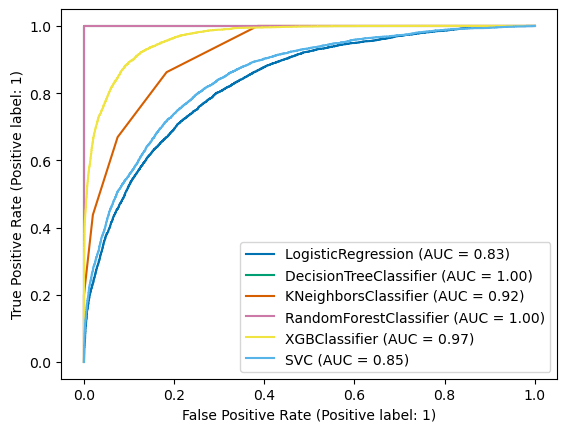

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(xgb,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

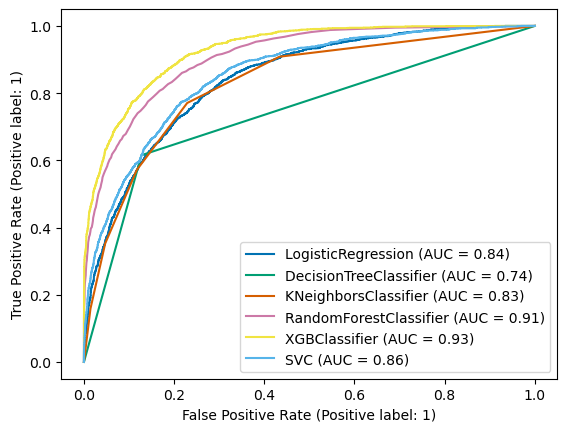

In [142]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

### WE have again proved that we will use the XGboost Classifier as the best  model

- The Logistic Regression is only covering 83% of training data and only 84% of the test data, whereas XGB classifier is covering 97% of training data as well as 93% of test data which is the higest . Random forest may have 100% at train buts its only able to give 91% to test so we will go with Xgboost 
- closest to  XGboost classifier model is random forest Classifier but the scores a a little better with XGBoost
- theXGboost  will be an even better model with Hyperparameter tuning which will increase 

## Hyper parameter Tuning

In [143]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb = xgb.XGBClassifier()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'gamma': [0.1,0.5,1,10,16,32,64],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.3, 0.2],
              'max_depth': [5,6,7,8,9,10],
              'n_estimators': [80,100,120,130,150,200],
              'reg_alpha': [0.1,0.5,1,10,16,32,64],
              'reg_lambda': [0.1,0.5,1,10,16,32,64]
             }

RCV = RandomizedSearchCV(xgb,parameters, n_jobs = -1, scoring='accuracy')
RCV.fit(X_train_ns,y_train_ns) #fitting data into the model
RCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

{'reg_lambda': 64,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 8,
 'learning_rate': 0.06,
 'gamma': 0.1}

In [144]:
import xgboost as xgb

xgb = xgb.XGBClassifier(reg_lambda= 10,reg_alpha= 0.1,n_estimators= 200,max_depth= 10,learning_rate= 0.06,gamma= 0.5)

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=3)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 87.34939759036145
Cross Val Score : 86.90067301810124
[[5794  365]
 [ 664 1311]]


We see that after tuning we are abe to increase the score a little bit to 87.35%  which is very good as its giving the highest among all the models , we also see that the Cv score is come much closer to the  accuracy score @ 86.91% which is great as the closer the score the better the model. let save the xgb model in pickle file  

In [145]:
RCV_pred=RCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,RCV_pred) #Checking Final Accuracy

0.8682075239734448

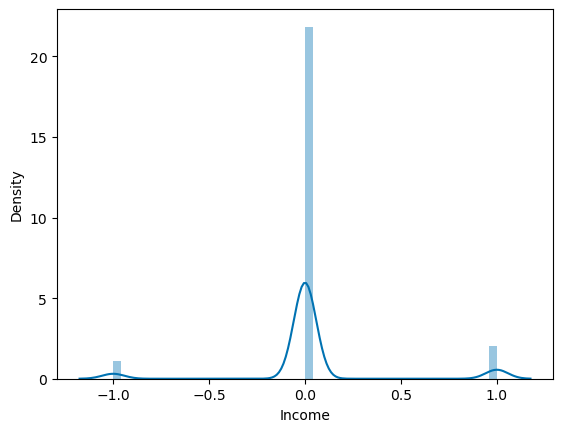

In [146]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

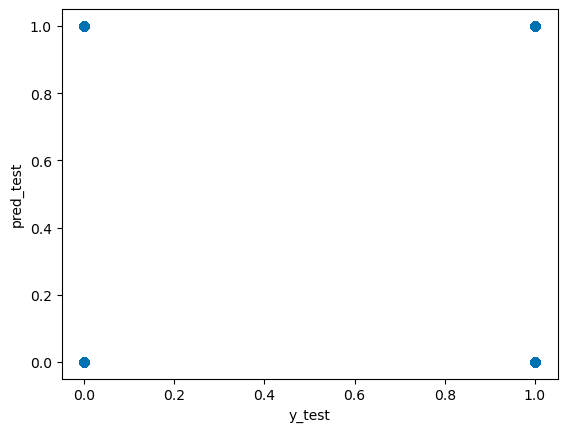

In [147]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see that the model is accurate as the points in 0 are shown in 0 and 1 in 1 and the graph shows noraml distribution as well 

In [148]:
import pickle
filename = 'census_income.pkl'
pickle.dump(RCV,open(filename,'wb'))

## Conclusion

In [149]:
loaded_model = pickle.load(open('census_income.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

86.82075239734448


In [150]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],RCV_pred[:]],index=['Predicted','Orignal'])

In [151]:
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     1     0     0     1     0     0     0     0     0  ...   
Orignal       0     1     0     0     1     0     0     0     0     0  ...   

           8124  8125  8126  8127  8128  8129  8130  8131  8132  8133  
Predicted     0     0     1     0     0     0     0     1     1     0  
Orignal       0     0     1     0     0     0     0     1     1     0  

[2 rows x 8134 columns]